# Official Building

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import listdir
import time
from tqdm.notebook import tqdm
from shapely.geometry import Point, Polygon
import shapely
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from textblob import TextBlob
from shapely.geometry import Point, Polygon
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely

In [17]:
tweets = pd.read_json(f'H:/School/fall2021/nlp/project/playgrounddump/dataids.jsonl', lines=True, encoding='utf-16')

In [18]:
tweets['vaccineincluded'] = tweets['full_text'].map(lambda x: 'vaccine' in x or 'vaccination' in x or 'Phizer' in x or 'phizer' in x or 'vaccin' in x or 'pharma' in x)

In [19]:
tweets['monthyear'] = tweets['created_at'].map(lambda x: str(x.year)+'/'+str(x.month))
tweets['inus'] = tweets['place'].map(lambda x: x['country_code'] == 'US' if x is not None else False)
tweets['cityname'] = tweets['place'].map(lambda x: x['full_name'] if x is not None else False)

In [20]:
usvtweets = tweets[tweets['inus'] & tweets['vaccineincluded']]

In [21]:
usvtweets.groupby('monthyear').count()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,vaccineincluded,inus,cityname
monthyear,,,,,,,,,,,,,,,,,,,,,
2020/10,57,57,57,57,57,57,57,57,1,1,...,57,10,2,2,2,2,0,57,57,57
2020/11,103,103,103,103,103,103,103,103,12,12,...,103,12,7,7,7,5,0,103,103,103
2020/12,626,626,626,626,626,626,626,626,32,32,...,626,44,25,25,25,25,0,626,626,626
2020/3,6,6,6,6,6,6,6,6,0,0,...,6,0,0,0,0,0,0,6,6,6
2020/4,26,26,26,26,26,26,26,26,0,0,...,26,2,1,1,1,1,0,26,26,26
2020/5,76,76,76,76,76,76,76,76,0,0,...,76,7,2,2,2,2,0,76,76,76
2020/6,23,23,23,23,23,23,23,23,1,1,...,23,1,1,1,1,1,0,23,23,23
2020/7,90,90,90,90,90,90,90,90,3,3,...,90,16,2,2,2,2,0,90,90,90
2020/8,143,143,143,143,143,143,143,143,3,3,...,143,29,1,1,1,1,0,143,143,143


In [22]:
usvtweets['cords'] = usvtweets['coordinates'].map(lambda x: x['coordinates'])
usvtweets['lat'] = usvtweets['cords'].map(lambda x: x[1])
usvtweets['long'] = usvtweets['cords'].map(lambda x: x[0])

C:\Users\Barrett\AppData\Local\Temp/ipykernel_25056/2948349702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usvtweets['cords'] = usvtweets['coordinates'].map(lambda x: x['coordinates'])
C:\Users\Barrett\AppData\Local\Temp/ipykernel_25056/2948349702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usvtweets['lat'] = usvtweets['cords'].map(lambda x: x[1])
C:\Users\Barrett\AppData\Local\Temp/ipykernel_25056/2948349702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [23]:
geovax = gpd.GeoDataFrame(usvtweets, geometry=gpd.points_from_xy(usvtweets.long, usvtweets.lat))

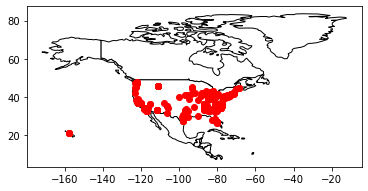

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
geovax[geovax['monthyear']=='2021/10'].plot(ax=ax, color='red')

plt.show()

# Analysis

In [2]:
tweetsclean = pd.read_csv("H:/School/fall2021/nlp/project/finaldataset.csv", encoding='utf-16')
labeltweets = pd.read_csv('C:/Users/Barrett/ourdata/truthtweets.tsv', sep='\t')
# labeltweets = pd.read_csv('C:/Users/Barrett/ourdata/labeldevtweets.tsv', sep='\t')
extratweets = pd.read_csv('C:/Users/Barrett/ourdata/extradata.csv')
tweetsclean = tweetsclean.drop(['full_text', 'id_str', 'Unnamed: 0'], axis=1)
tweetswithlabels = tweetsclean.merge(labeltweets, on='id', how='inner').merge(extratweets, on='id', how='inner')
tweetswithlabels['monthyear'] = tweetswithlabels['monthyear'].astype('datetime64[ns]')

In [3]:
tweetswithlabels[tweetswithlabels['truth']==0].groupby('monthyear').count()

,created_at,id,truncated,display_text_range,entities,geo,coordinates,place,favorited,retweeted,...,lat,long,geometry,label,text,truth,Unnamed: 0,retweet_count,possibly_sensitive,favorite_count
monthyear,,,,,,,,,,,,,,,,,,,,,
2020-04-01,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2020-05-01,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
2020-06-01,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2020-07-01,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2020-08-01,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
2020-09-01,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
2020-10-01,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,6,7
2020-11-01,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
2020-12-01,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,51,54


In [36]:
cmap = ListedColormap(["red", "gold", "green", "black"])

Text(0, 0.5, 'Number of Tweets')

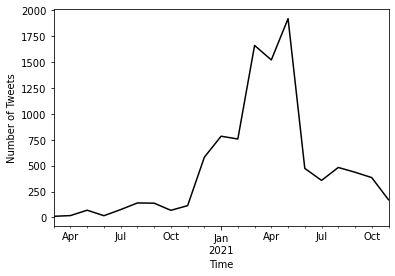

In [45]:
d1 = tweetswithlabels.groupby('monthyear').count()['id']

ax = d1.groupby('monthyear').mean().plot(color="black")
ax.set_xlabel('Time')
ax.set_ylabel('Number of Tweets')

,monthyear,negative,neutral,positive,number of tweets
0,2020-03-01,0.000000,0.727273,0.272727,0.001079
1,2020-04-01,0.111111,0.722222,0.166667,0.002846
2,2020-05-01,0.185714,0.557143,0.257143,0.009714
3,2020-06-01,0.176471,0.647059,0.176471,0.011383
4,2020-07-01,0.078947,0.631579,0.289474,0.018840
5,2020-08-01,0.071429,0.521429,0.407143,0.032578
6,2020-09-01,0.072464,0.586957,0.340580,0.046119
7,2020-10-01,0.101449,0.492754,0.405797,0.052890
8,2020-11-01,0.096491,0.552632,0.350877,0.064076
9,2020-12-01,0.092784,0.323024,0.584192,0.121185


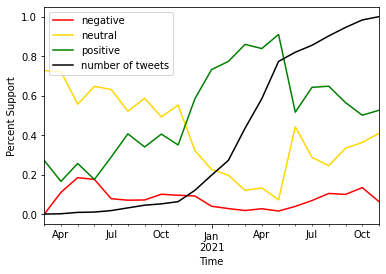

In [78]:
d1 = tweetswithlabels[tweetswithlabels['truth']==0].groupby('monthyear').count()['id']/tweetswithlabels.groupby('monthyear').count()['id']
d2 = tweetswithlabels[tweetswithlabels['truth']==1].groupby('monthyear').count()['id']/tweetswithlabels.groupby('monthyear').count()['id']
d3 = tweetswithlabels[tweetswithlabels['truth']==2].groupby('monthyear').count()['id']/tweetswithlabels.groupby('monthyear').count()['id']
d4 = tweetswithlabels.groupby('monthyear').count()['id']
b = False
for d in d4.index:
    if b:
        d4[d] = d4[d] + d4[x]
    b=True
    x = d
d4 = d4/len(tweetswithlabels)

d1 = d1.reset_index().rename({'id':'negative'}, axis=1)[['monthyear', 'negative']]
d2 = d2.reset_index().rename({'id':'neutral'}, axis=1)[['monthyear', 'neutral']]
d3 = d3.reset_index().rename({'id':'positive'}, axis=1)[['monthyear', 'positive']]
d4 = d4.reset_index().rename({'id':'number of tweets'}, axis=1)[['monthyear', 'number of tweets']]

d1 = d1.merge(d2, on='monthyear', how='inner').merge(d3, on='monthyear', how='inner').merge(d4, on='monthyear', how='inner').fillna(0)

ax = d1.groupby('monthyear').mean().plot(cmap=cmap)

ax.set_xlabel('Time')
ax.set_ylabel('Percent Support')
d1


In [12]:
tea = tweetswithlabels.sample(1)['text'].item()
testimonial = TextBlob(tea)
testimonial.sentiment

Sentiment(polarity=-0.05, subjectivity=0.05)

In [13]:
tweetswithlabels['polarity'] = tweetswithlabels['text'].map(lambda x: TextBlob(x).sentiment.polarity)
tweetswithlabels['subjectivity'] = tweetswithlabels['text'].map(lambda x: TextBlob(x).sentiment.subjectivity)

In [14]:
tweetswithlabels.groupby('truth').mean()[['polarity', 'subjectivity']]

,polarity,subjectivity
truth,,
0,0.015658,0.313797
1,0.101496,0.319085
2,0.143446,0.333981


In [15]:
tweetswithlabels.groupby('truth').var()[['polarity', 'subjectivity']]

,polarity,subjectivity
truth,,
0,0.061986,0.091529
1,0.066575,0.095515
2,0.057844,0.071247


,monthyear,negative,neutral,positive
0,2020-04-01,0.438636,0.354639,0.100000
1,2020-05-01,0.406838,0.513175,0.499162
2,2020-06-01,0.354630,0.316421,0.433333
3,2020-07-01,0.468434,0.351242,0.343614
4,2020-08-01,0.463163,0.329684,0.374261
5,2020-09-01,0.432766,0.394186,0.410193
6,2020-10-01,0.475085,0.424098,0.339138
7,2020-11-01,0.319308,0.405224,0.444645
8,2020-12-01,0.287337,0.352704,0.312876
9,2021-01-01,0.301492,0.293526,0.321872


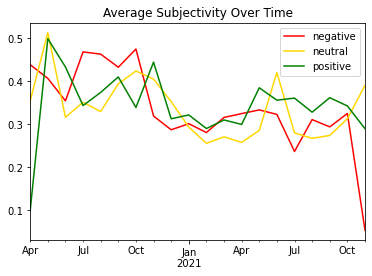

In [16]:
d1 = tweetswithlabels[tweetswithlabels['truth']==0].groupby('monthyear').mean()['subjectivity']
d2 = tweetswithlabels[tweetswithlabels['truth']==1].groupby('monthyear').mean()['subjectivity']
d3 = tweetswithlabels[tweetswithlabels['truth']==2].groupby('monthyear').mean()['subjectivity']

d1 = d1.reset_index().rename({'subjectivity':'negative'}, axis=1)[['monthyear', 'negative']]
d2 = d2.reset_index().rename({'subjectivity':'neutral'}, axis=1)[['monthyear', 'neutral']]
d3 = d3.reset_index().rename({'subjectivity':'positive'}, axis=1)[['monthyear', 'positive']]

d1 = d1.merge(d2, on='monthyear', how='inner').merge(d3, on='monthyear', how='inner').fillna(0)

ax = d1.groupby('monthyear').mean().plot(cmap=cmap)
ax.set_title('Average Subjectivity Over Time')
ax.set_xlabel('')

d1

,monthyear,negative,neutral,positive
0,2020-04-01,-0.031818,-0.012091,0.041667
1,2020-05-01,-0.055944,0.098322,0.193261
2,2020-06-01,-0.061574,0.054157,0.283333
3,2020-07-01,0.100253,0.098786,0.052843
4,2020-08-01,0.098011,0.053092,0.183512
5,2020-09-01,-0.051872,0.088307,0.144803
6,2020-10-01,0.228827,0.033126,0.161652
7,2020-11-01,-0.150340,0.153473,0.191368
8,2020-12-01,0.017651,0.103779,0.150470
9,2021-01-01,-0.003276,0.065907,0.125798


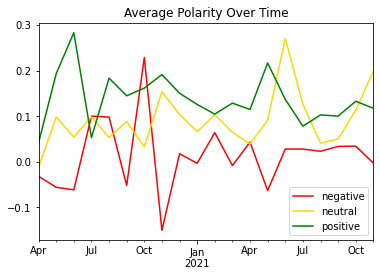

In [17]:
d1 = tweetswithlabels[tweetswithlabels['truth']==0].groupby('monthyear').mean()['polarity']
d2 = tweetswithlabels[tweetswithlabels['truth']==1].groupby('monthyear').mean()['polarity']
d3 = tweetswithlabels[tweetswithlabels['truth']==2].groupby('monthyear').mean()['polarity']

d1 = d1.reset_index().rename({'polarity':'negative'}, axis=1)[['monthyear', 'negative']]
d2 = d2.reset_index().rename({'polarity':'neutral'}, axis=1)[['monthyear', 'neutral']]
d3 = d3.reset_index().rename({'polarity':'positive'}, axis=1)[['monthyear', 'positive']]

d1 = d1.merge(d2, on='monthyear', how='inner').merge(d3, on='monthyear', how='inner').fillna(0)

ax = d1.groupby('monthyear').mean().plot(cmap=cmap)
ax.set_title('Average Polarity Over Time')
ax.set_xlabel('')

d1

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world[world.name == 'United States of America']

In [19]:
def stuff(y):
    if type(y) != shapely.geometry.polygon.Polygon:
        return [x for x in y.geoms]
    return [y]

world['polys'] = world.geometry.map(lambda x: stuff(x))

In [219]:
geovax = gpd.GeoDataFrame(tweetswithlabels, geometry=gpd.points_from_xy(tweetswithlabels.long, tweetswithlabels.lat))

In [115]:
gpd.GeoDataFrame(tweetswithlabels, geometry=gpd.points_from_xy(tweetswithlabels.long, tweetswithlabels.lat))['truth']

0         neutral
1        positive
2         neutral
3         neutral
4         neutral
           ...   
10186     neutral
10187    positive
10188    negative
10189     neutral
10190    negative
Name: truth, Length: 10191, dtype: object

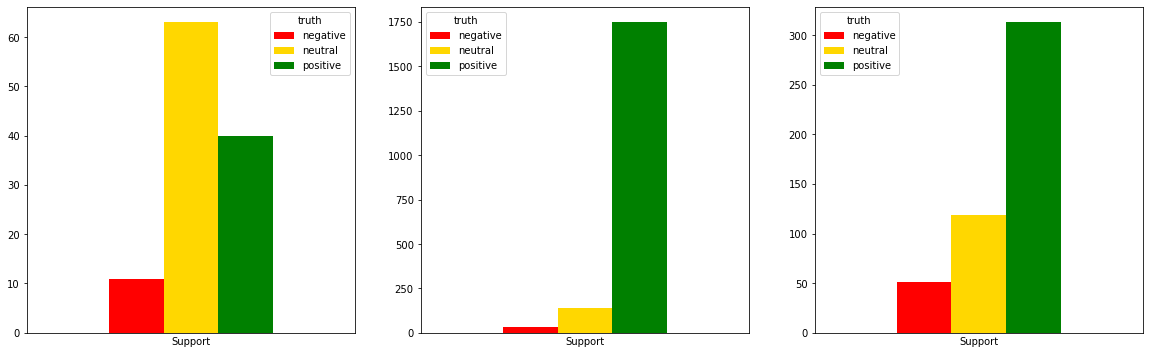

In [139]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
tmp = gpd.GeoDataFrame(tweetswithlabels, geometry=gpd.points_from_xy(tweetswithlabels.long, tweetswithlabels.lat))
translate =  {0:'negative', 1:'neutral', 2:'positive'}
# tmp['truth'] = tmp['truth'].apply(lambda x: translate[x])
tmp = geovax.groupby(['monthyear', 'truth']).count()['id']
cmap = ListedColormap(["red", "gold", "green"])
pd.DataFrame(tmp['2020-11-01']).T.plot(ax=ax[0], kind='bar', cmap=cmap)
pd.DataFrame(tmp['2021-05-01']).T.plot(ax=ax[1], kind='bar', cmap=cmap)
pd.DataFrame(tmp['2021-08-01']).T.plot(ax=ax[2], kind='bar', cmap=cmap)
for i in range(len(ax)):
    ax[i].set_xlabel('Support')
    ax[i].set_xticks([])

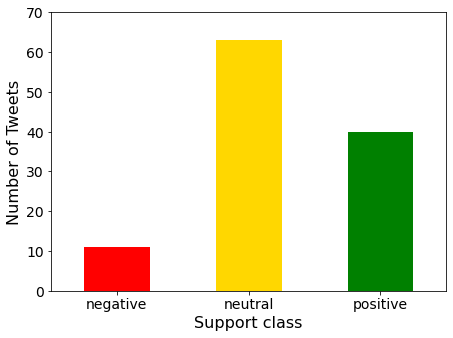

In [251]:
def bar_plot(month, save=False):
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    tmp.loc[month].droplevel(level=0).plot.bar(color=['red', 'gold', 'green'],rot=0, ax=ax)
    plt.xlabel('Support class', fontsize=16)
    plt.ylabel('Number of Tweets', fontsize=16)
    if month == '2020-11-01':
        plt.yticks(np.arange(0, 80, step=10))
    elif month == '2021-05-01':
        plt.yticks(np.arange(0, 1750 + 250, step=250))
    elif month == '2021-08-01':
        plt.yticks(np.arange(0, 400, step=50))
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    if save:
        plt.savefig(f'images/barplot_sentiment_{month}.png')
    plt.show()
bar_plot('2020-11-01')

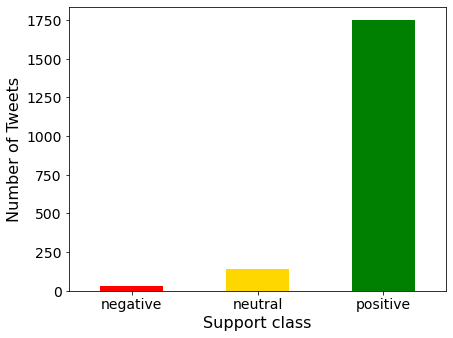

In [252]:
def bar_plot(month, save=False):
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    tmp.loc[month].droplevel(level=0).plot.bar(color=['red', 'gold', 'green'],rot=0, ax=ax)
    plt.xlabel('Support class', fontsize=16)
    plt.ylabel('Number of Tweets', fontsize=16)
    if month == '2020-11-01':
        plt.yticks(np.arange(0, 80, step=10))
    elif month == '2021-05-01':
        plt.yticks(np.arange(0, 1750 + 250, step=250))
    elif month == '2021-08-01':
        plt.yticks(np.arange(0, 400, step=50))
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    if save:
        plt.savefig(f'images/barplot_sentiment_{month}.png')
    plt.show()
bar_plot('2021-05-01')

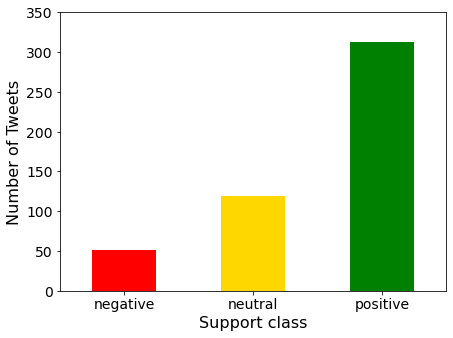

In [253]:
def bar_plot(month, save=False):
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    tmp.loc[month].droplevel(level=0).plot.bar(color=['red', 'gold', 'green'],rot=0, ax=ax)
    plt.xlabel('Support class', fontsize=16)
    plt.ylabel('Number of Tweets', fontsize=16)
    if month == '2020-11-01':
        plt.yticks(np.arange(0, 80, step=10))
    elif month == '2021-05-01':
        plt.yticks(np.arange(0, 1750 + 250, step=250))
    elif month == '2021-08-01':
        plt.yticks(np.arange(0, 400, step=50))
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    if save:
        plt.savefig(f'images/barplot_sentiment_{month}.png')
    plt.show()
bar_plot('2021-08-01')


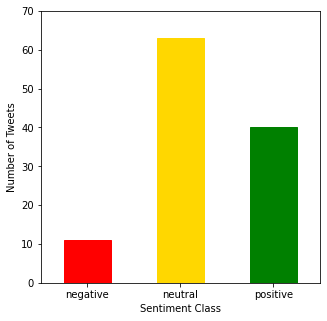

In [184]:
fig, ax = plt.subplots(figsize=(5, 5))
df = pd.DataFrame(tmp['2020-11-01'])
df.plot(ax=ax, kind='bar', color=['red', 'gold', 'green'])
ax.xaxis.set_tick_params(rotation=0)
ax.get_legend().remove()
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Number of Tweets')
colors = ['red', 'gold', 'green']
ax.set_yticks(list(range(0, 80, 10)))
for i, x in enumerate(ax.patches):
    x.set_color(colors[i])

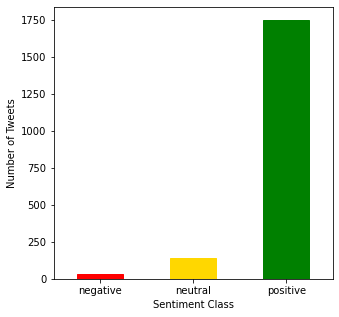

In [182]:
fig, ax = plt.subplots(figsize=(5, 5))
df = pd.DataFrame(tmp['2021-05-01'])
df.plot(ax=ax, kind='bar', color=['red', 'gold', 'green'])
ax.xaxis.set_tick_params(rotation=0)
ax.get_legend().remove()
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Number of Tweets')
colors = ['red', 'gold', 'green']
ax.set_yticks(list(range(0, 1750+250, 250)))
for i, x in enumerate(ax.patches):
    x.set_color(colors[i])

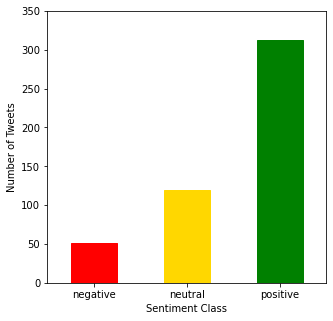

In [180]:
fig, ax = plt.subplots(figsize=(5, 5))
df = pd.DataFrame(tmp['2021-08-01'])
df.plot(ax=ax, kind='bar', color=['red', 'gold', 'green'])
ax.xaxis.set_tick_params(rotation=0)
ax.get_legend().remove()
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Number of Tweets')
colors = ['red', 'gold', 'green']
ax.set_yticks(list(range(0, 400, 50)))
for i, x in enumerate(ax.patches):
    x.set_color(colors[i])

In [179]:
list(range(0, 350, 50))

[0, 50, 100, 150, 200, 250, 300]

C:\Users\Barrett\anaconda3\envs\nlpclass\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


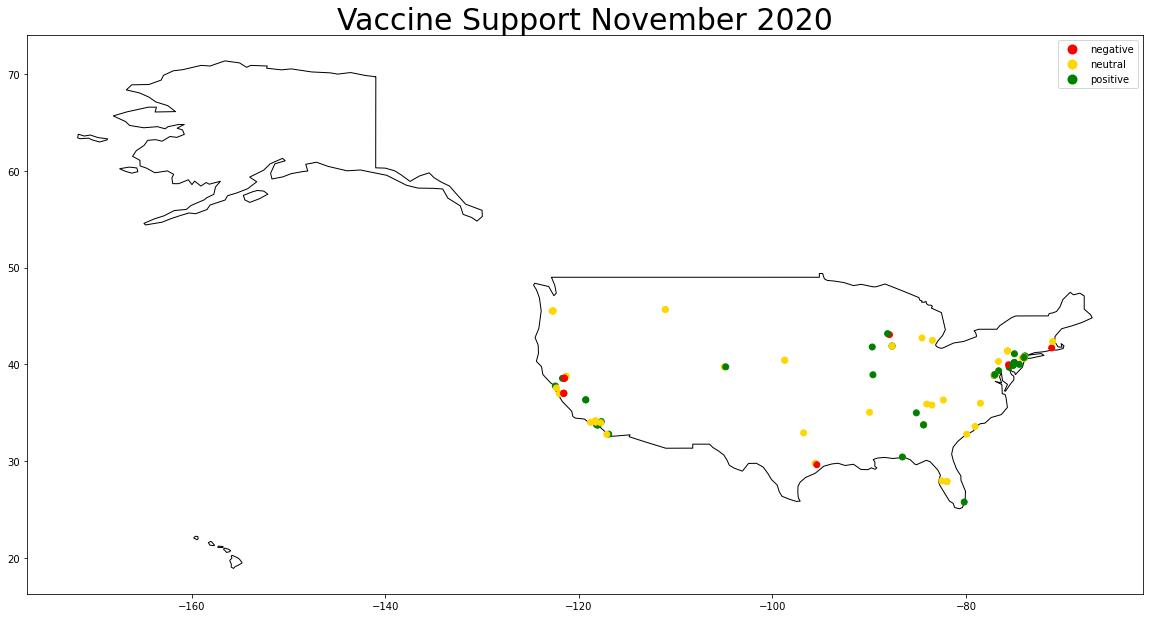

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world[world.name == 'United States of America'].plot(color='white', edgecolor='black', ax=ax)

# We can now plot our ``GeoDataFrame``.
geovax
geovx = geovax[geovax['monthyear']=='2020-11-01']
repl={0:'negative', 1:'neutral', 2:'positive'}
geovx.truth = geovx.truth.map(lambda x: repl[x])
geovx.plot(column='truth', ax=ax, cmap=cmap, legend=True, categorical=True)


ax.set_title('Vaccine Support November 2020', size=30)

plt.show()

TypeError: got an unexpected keyword argument 'labelsize'

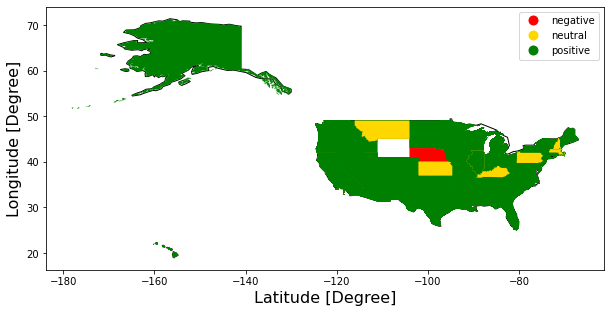

In [233]:
fig, ax = plt.subplots(figsize=(10,10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world[world.name == 'United States of America'].plot(color='white', edgecolor='black', ax=ax)

# We can now plot our ``GeoDataFrame``.
geovax
geovx = geovax[geovax['monthyear']=='2021-05-01']
# repl={0:'negative', 1:'neutral', 2:'positive'}
# geovx.truth = geovx.truth.map(lambda x: repl[x])
geovx.plot(column='truth', ax=ax, cmap=cmap, legend=True, categorical=True)



ax.set_xlabel('Latitude [Degree]',size=16)
ax.set_ylabel('Longitude [Degree]',size=16)
ax.set_xticks(ax.get_xticks(), labelsize=14)

plt.show()

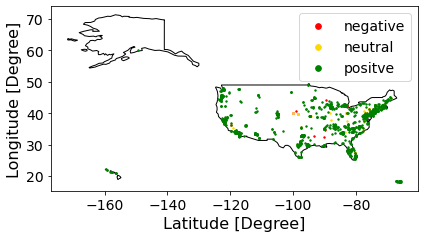

In [235]:
def map_plot(data, month, save=False):
    geovax = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.long, data.lat))
    fig, ax = plt.subplots()
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world[world.name == 'United States of America'].plot(color='white', edgecolor='black', ax=ax)
    # We can now plot our ``GeoDataFrame``.
    geovax[(data['monthyear']==month) & (data['truth'] == 'negative')].plot(ax=ax, color='red', label='negative', markersize=2)
    geovax[(data['monthyear']==month) & (data['truth'] == 'neutral')].plot(ax=ax, color='gold', label='neutral',  markersize=2)
    geovax[(data['monthyear']==month) & (data['truth'] == 'positive')].plot(ax=ax, color='green', label='positve',  markersize=2)
    plt.xlabel('Latitude [Degree]', fontsize=16)
    plt.ylabel('Longitude [Degree]', fontsize=16)
    ax.set_title('')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize=14, markerscale=4)
    plt.tight_layout()
    if save:
        plt.savefig(f'images/map_sent_{month}.png')
    plt.show()

#map_plot(usvtweets, "2020-11-01")
map_plot(geovx, "2021-05-01")

C:\Users\Barrett\anaconda3\envs\nlpclass\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


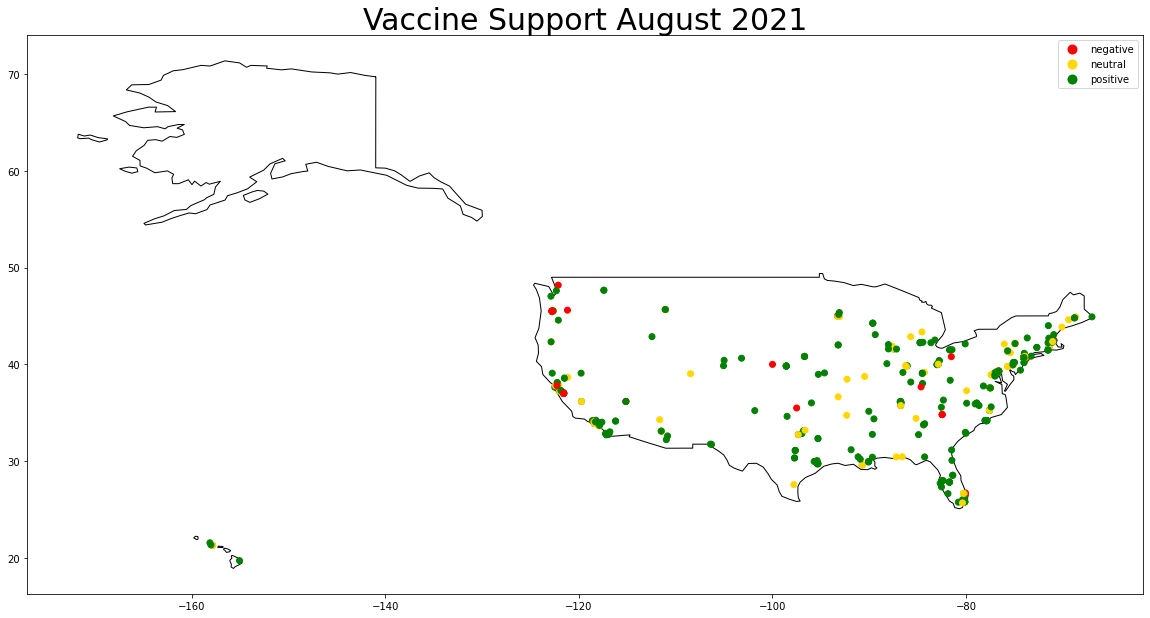

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world[world.name == 'United States of America'].plot(color='white', edgecolor='black', ax=ax)

# We can now plot our ``GeoDataFrame``.
geovax
geovx = geovax[geovax['monthyear']=='2021-08-01']
repl={0:'negative', 1:'neutral', 2:'positive'}
geovx.truth = geovx.truth.map(lambda x: repl[x])
geovx.plot(column='truth', ax=ax, cmap=cmap, legend=True, categorical=True)


ax.set_title('Vaccine Support August 2021', size=30)

plt.show()

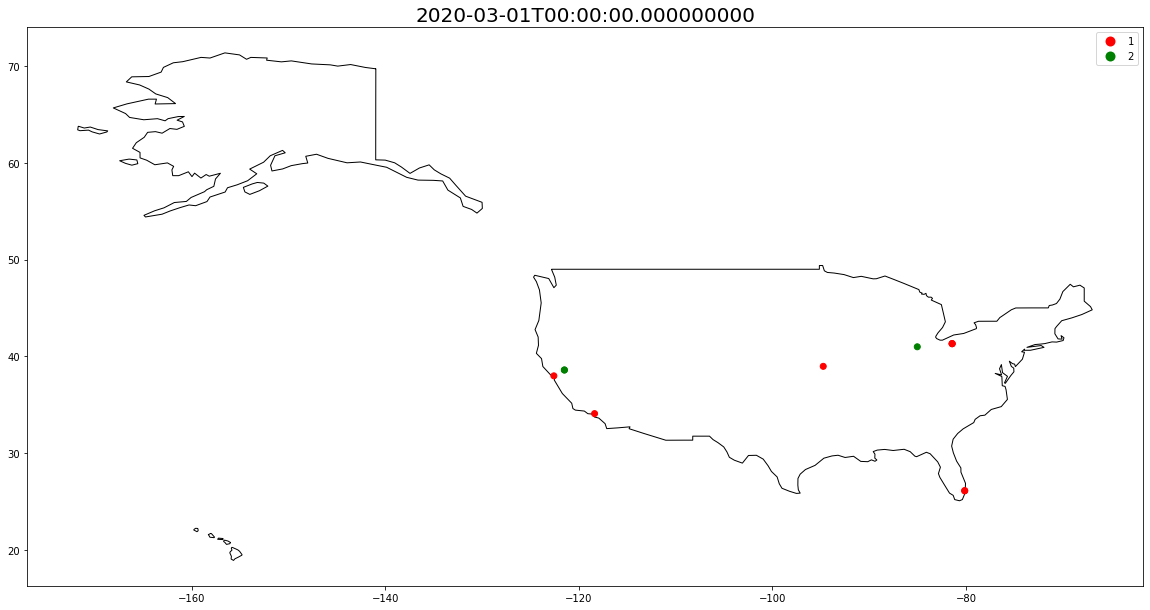

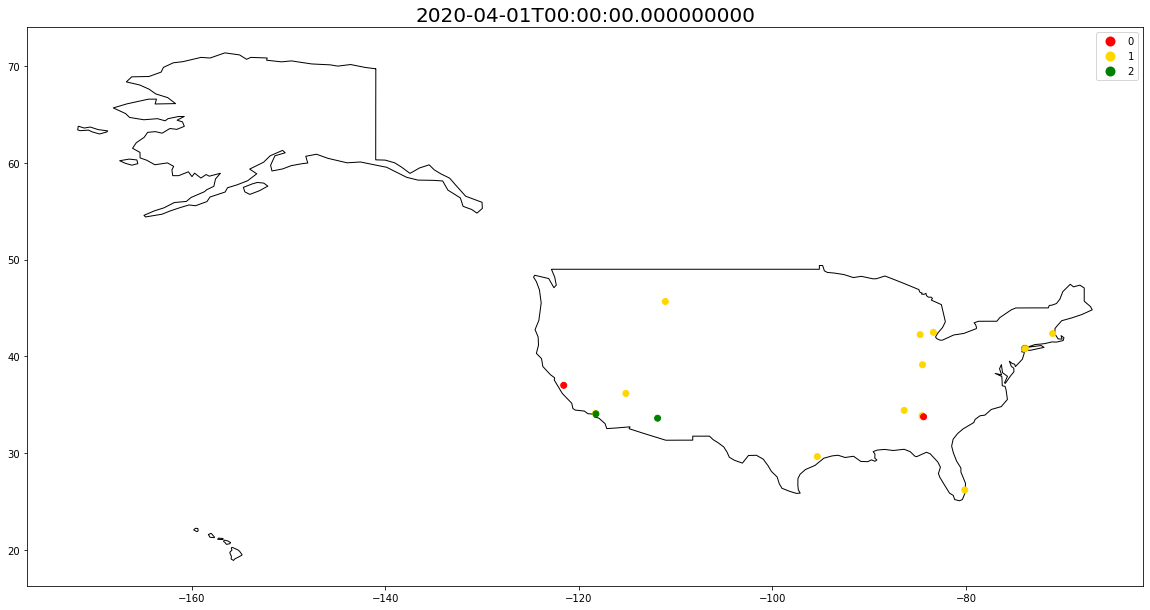

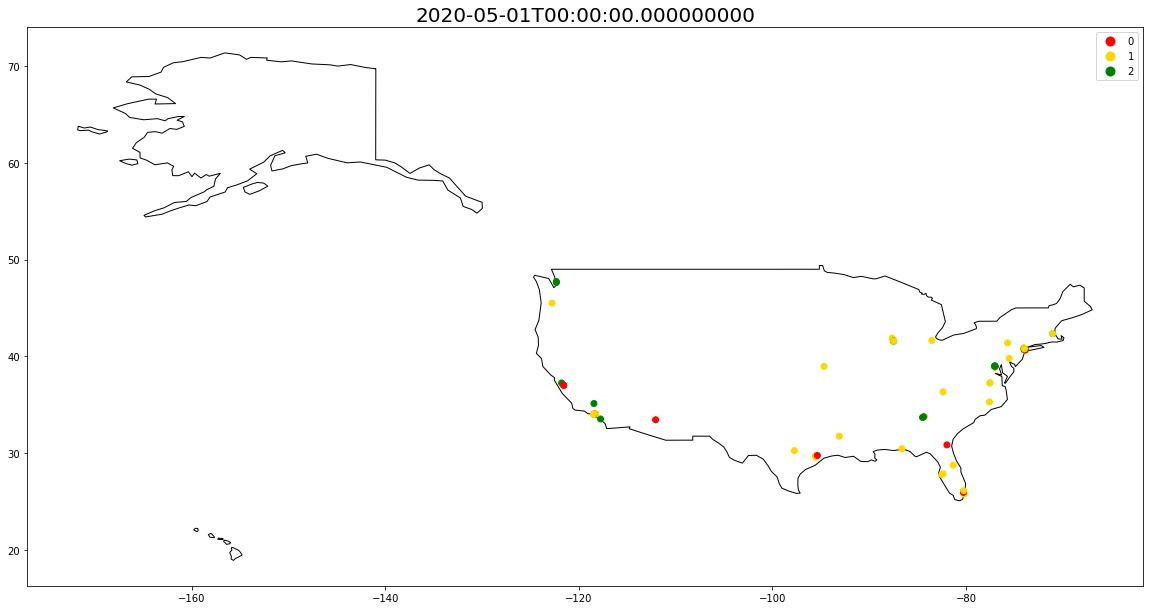

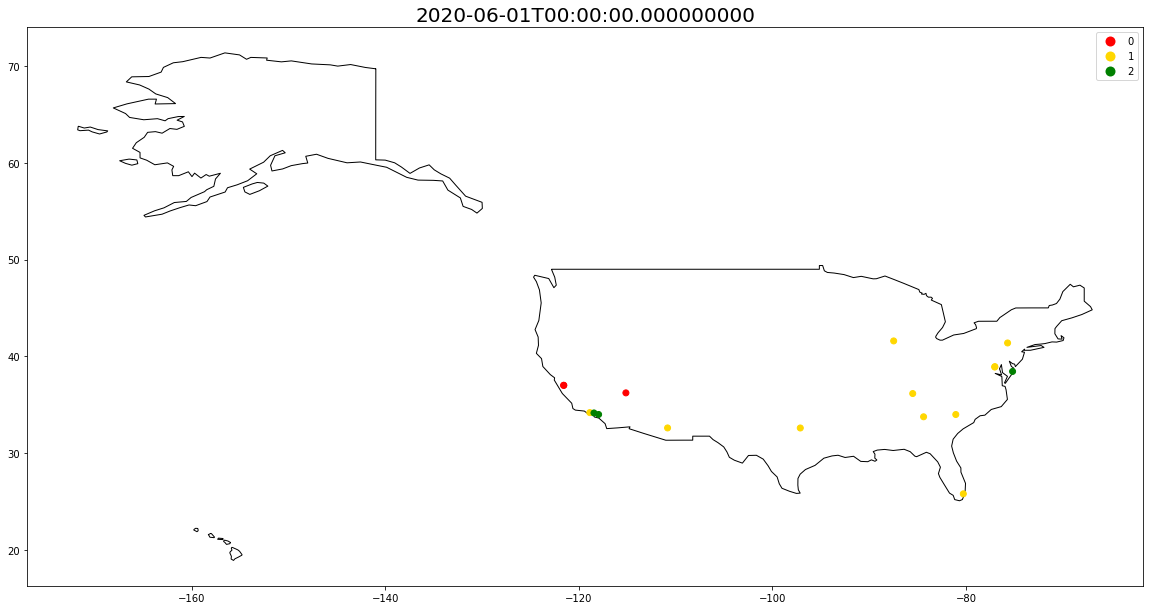

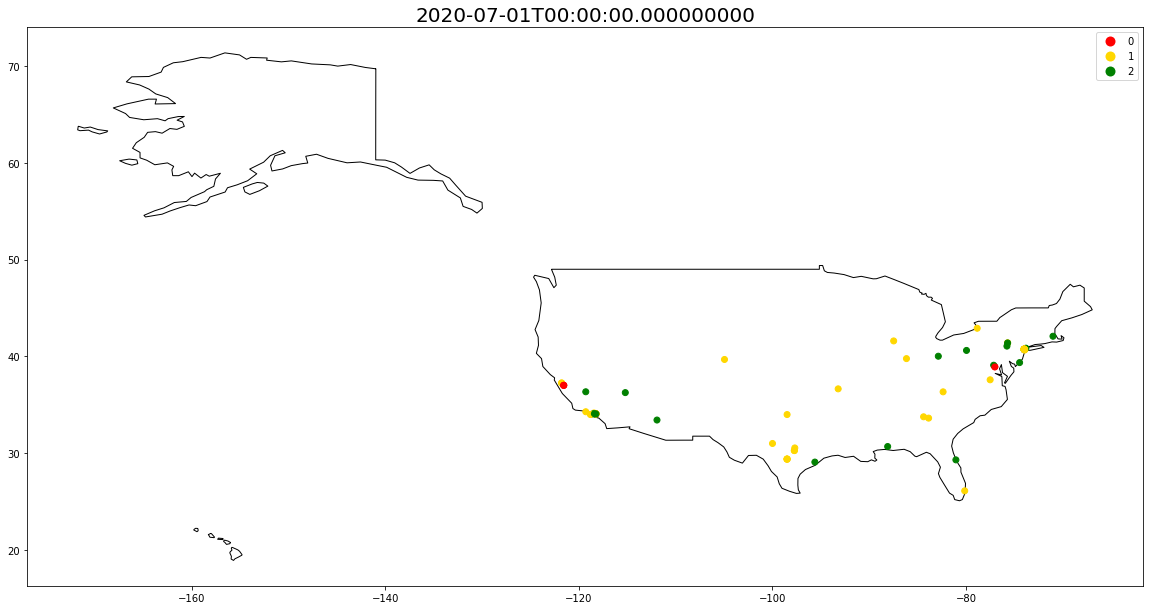

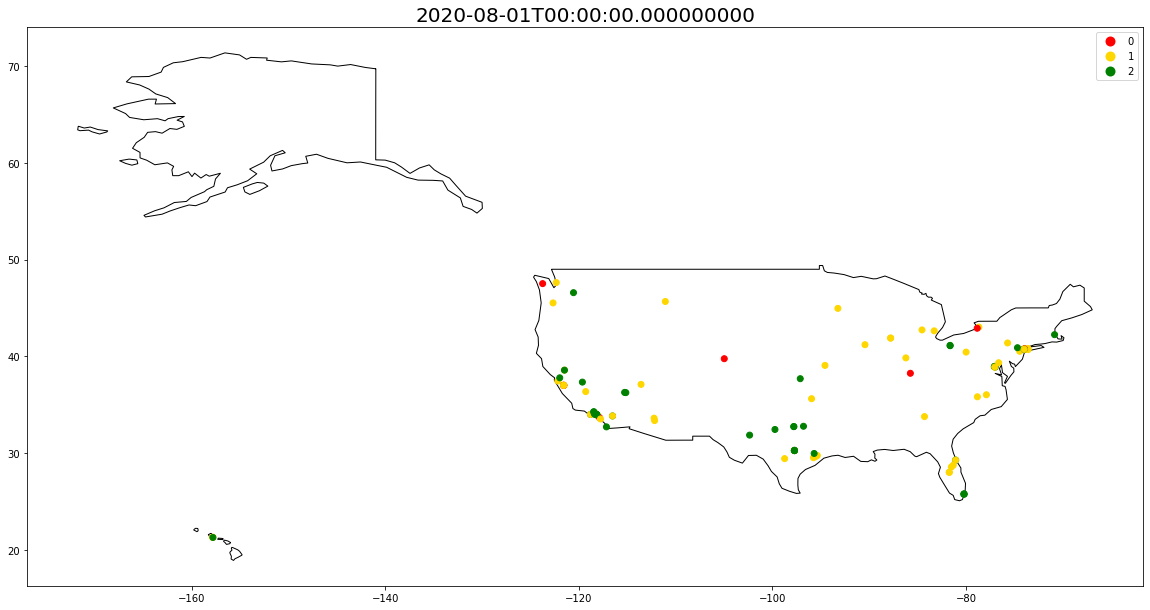

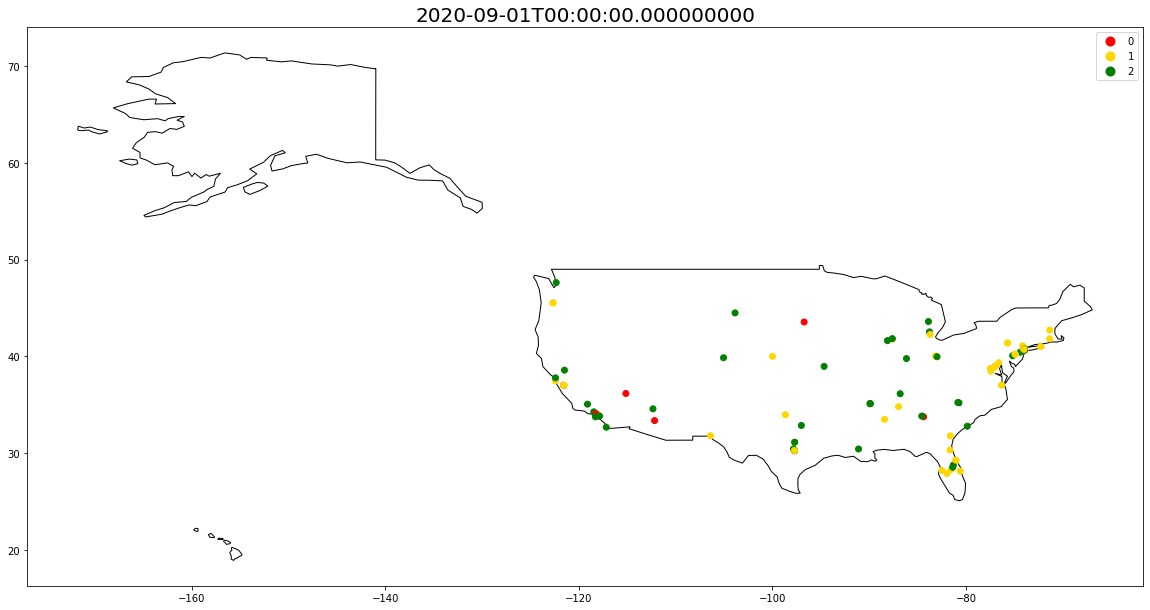

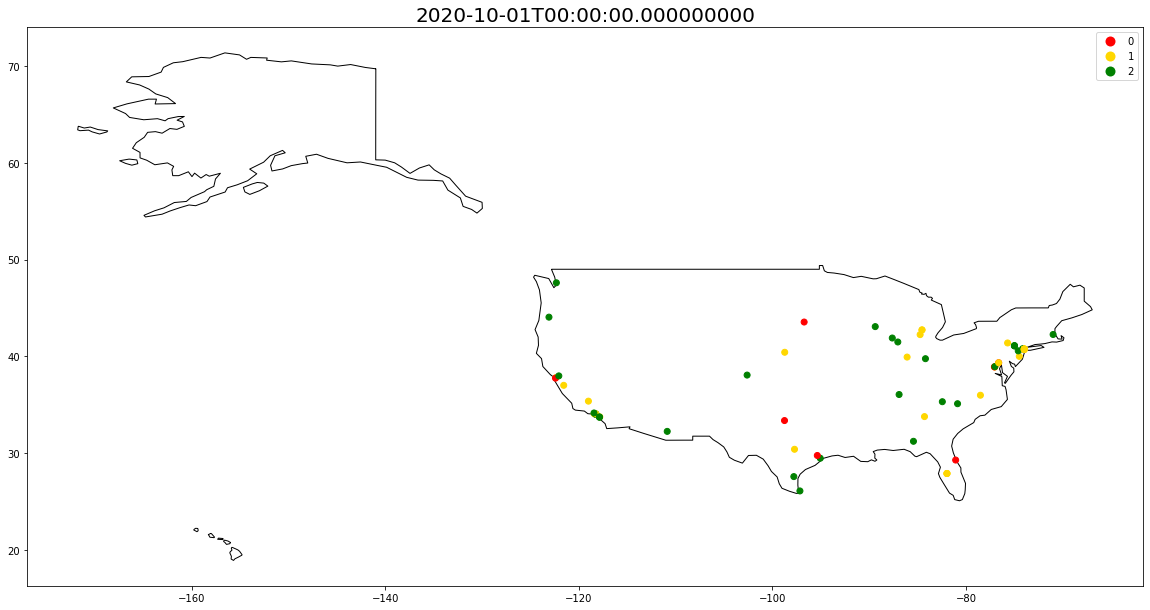

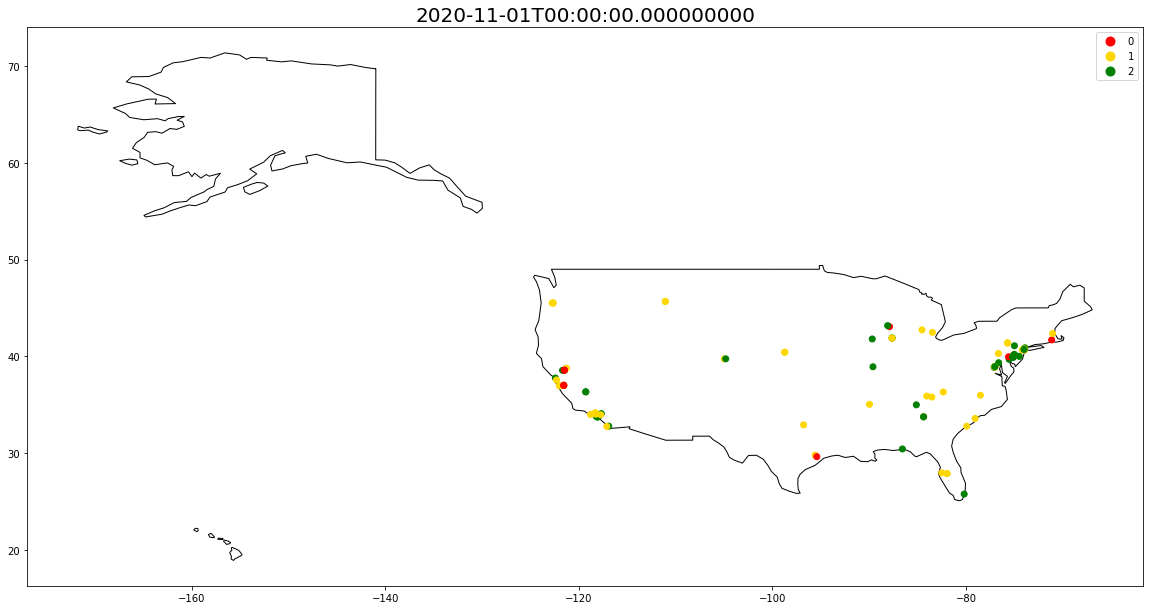

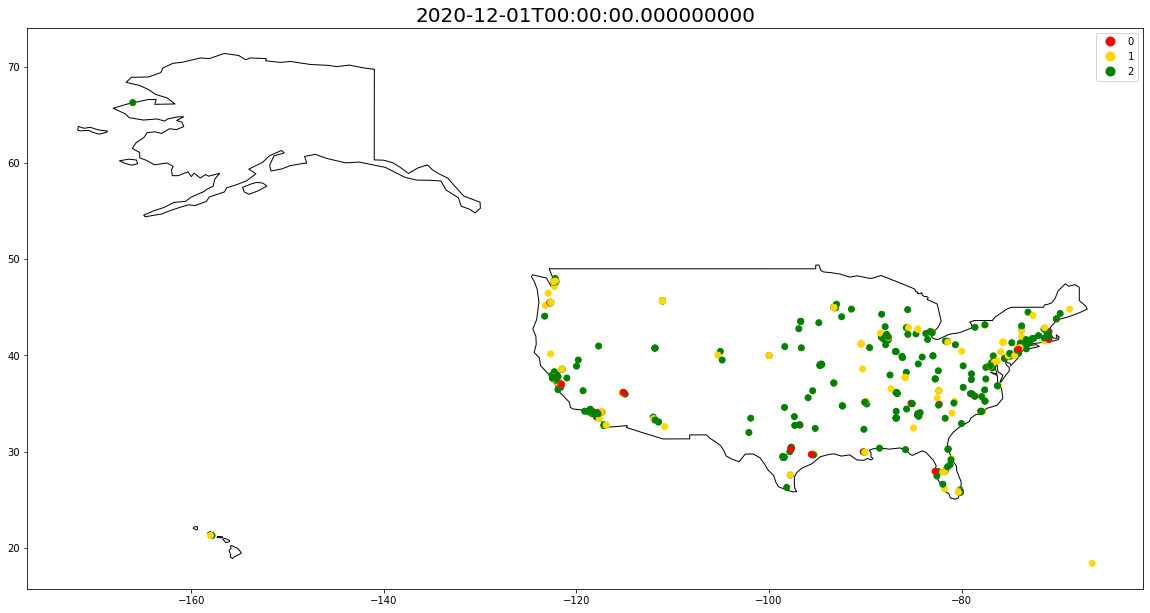

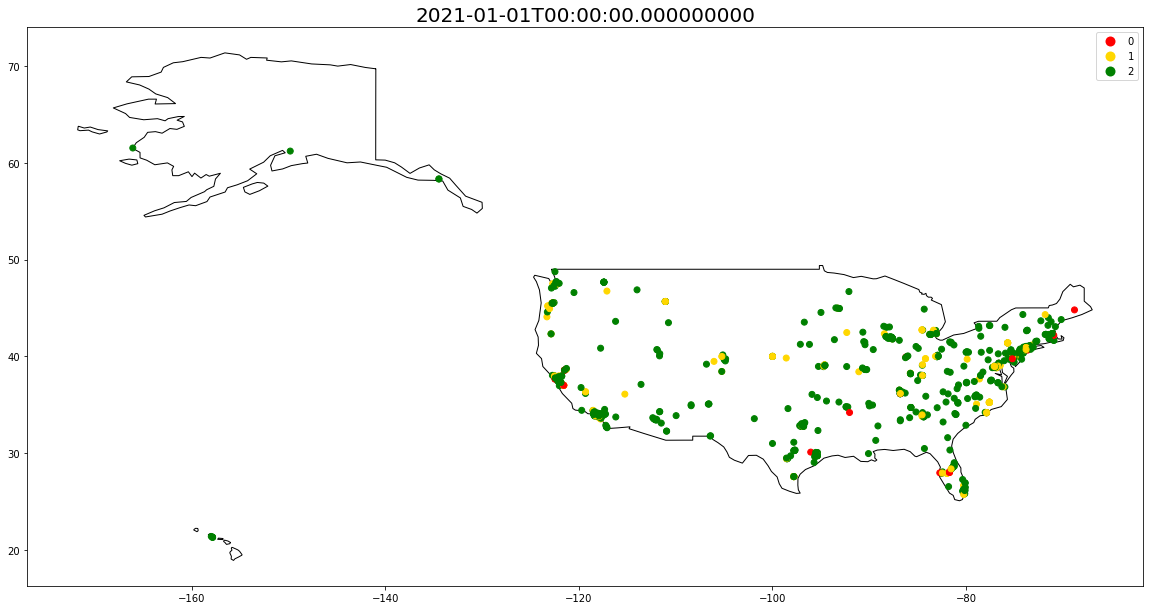

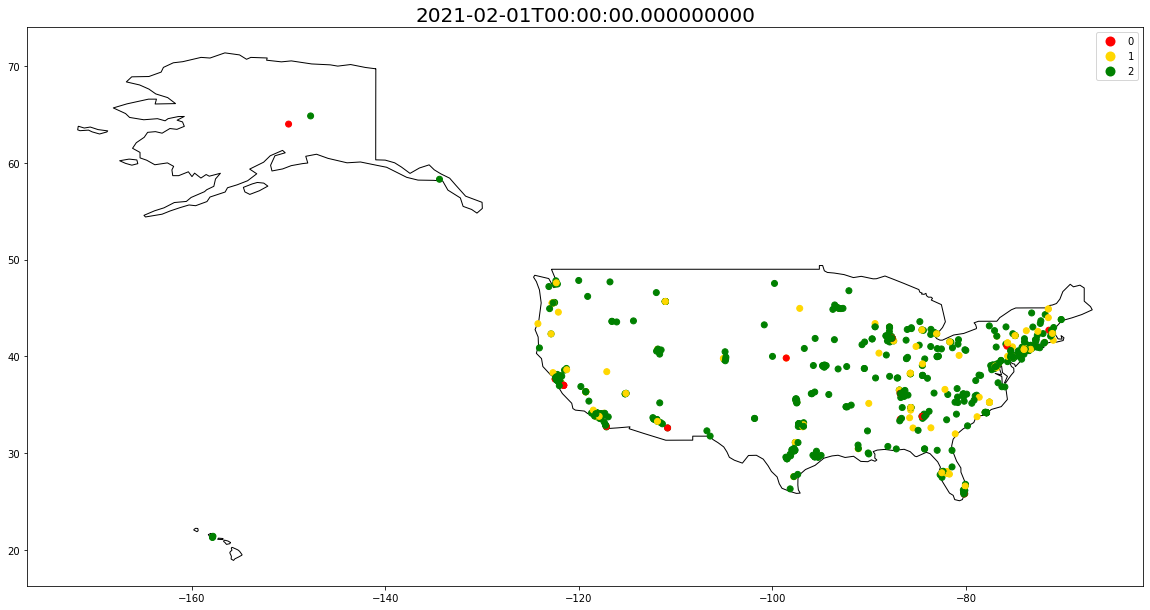

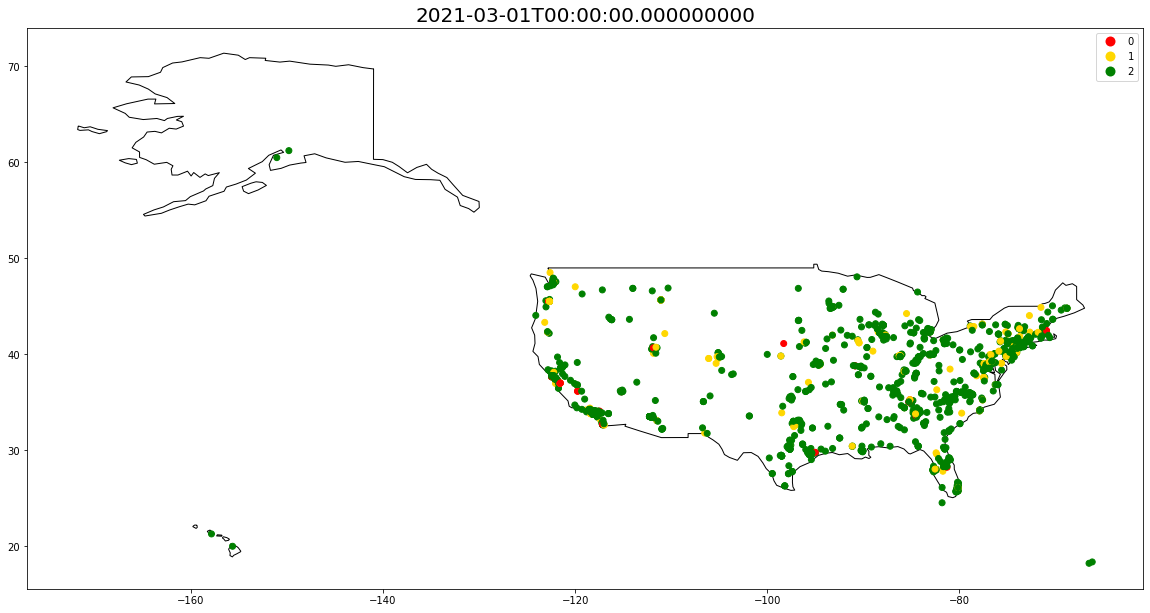

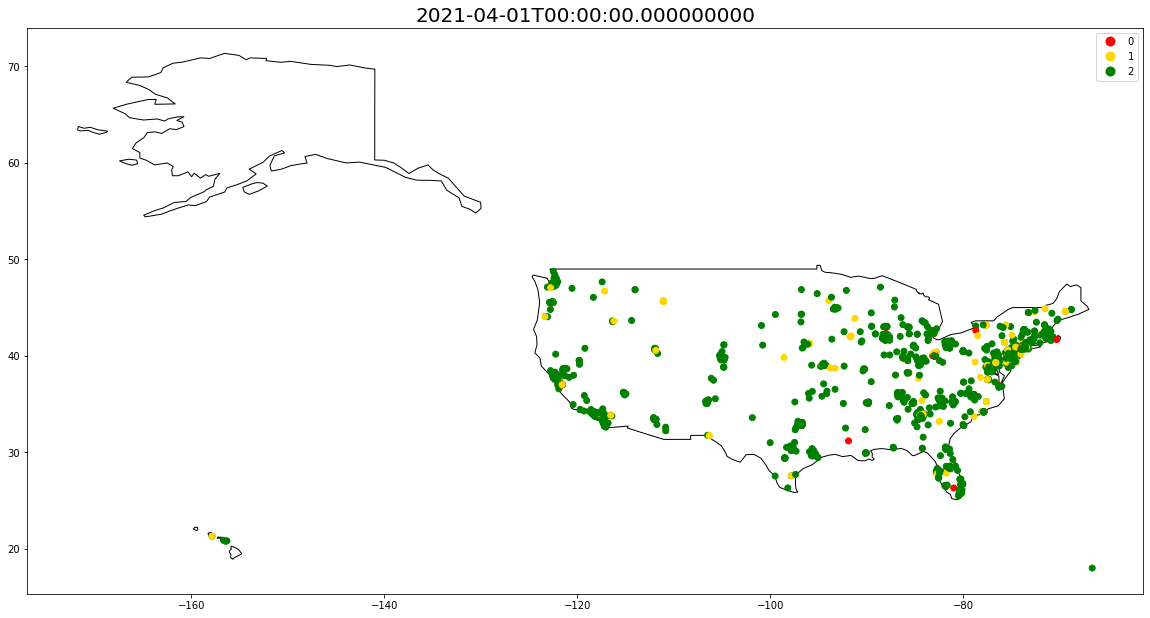

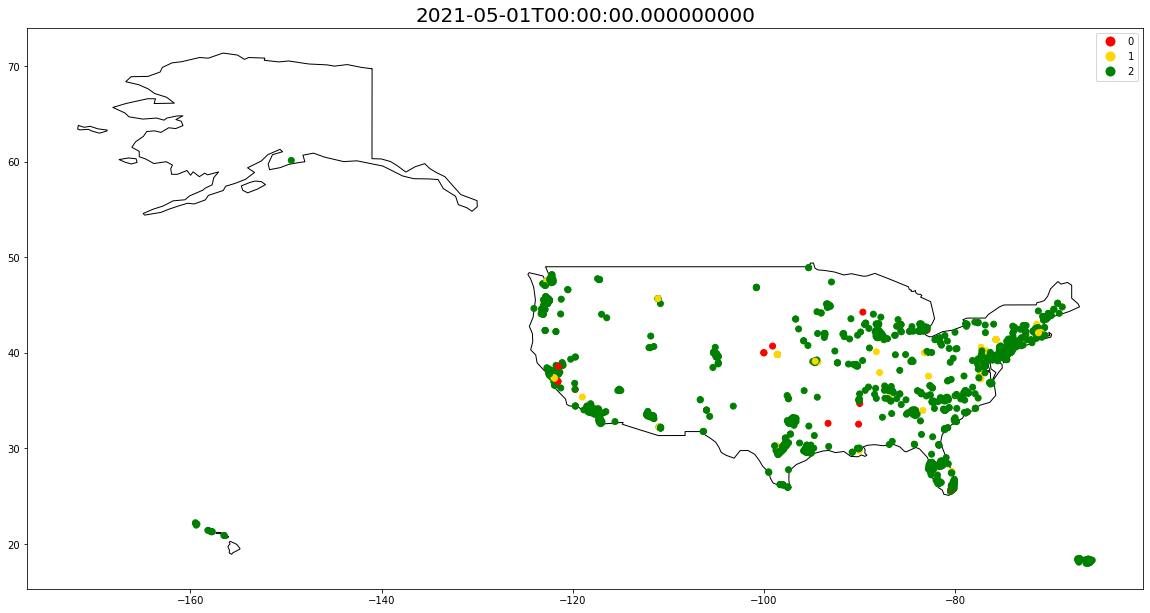

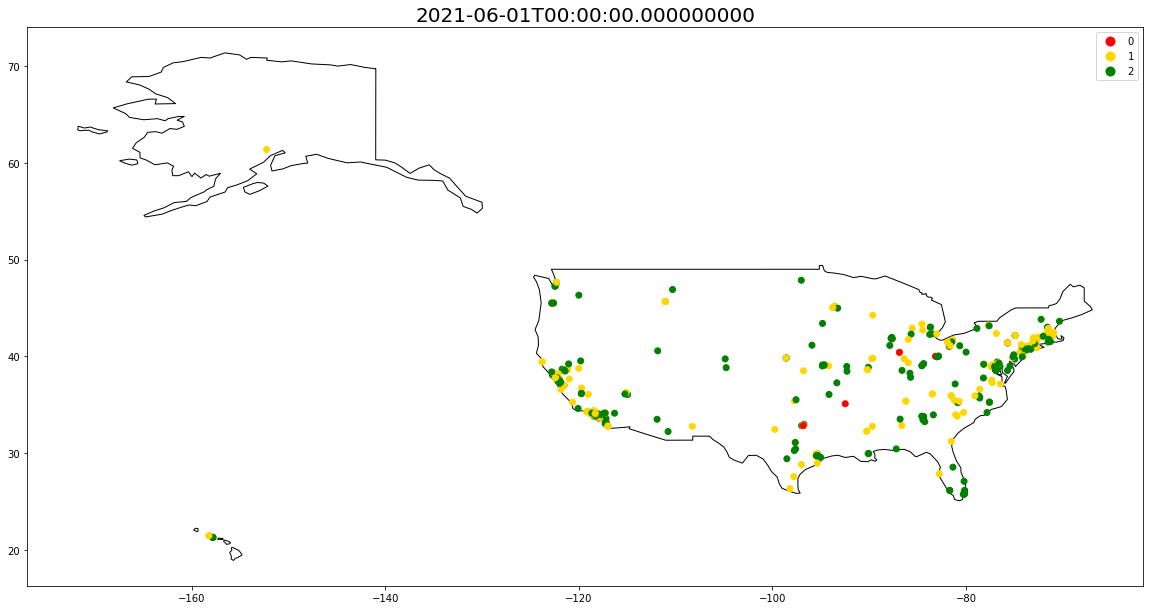

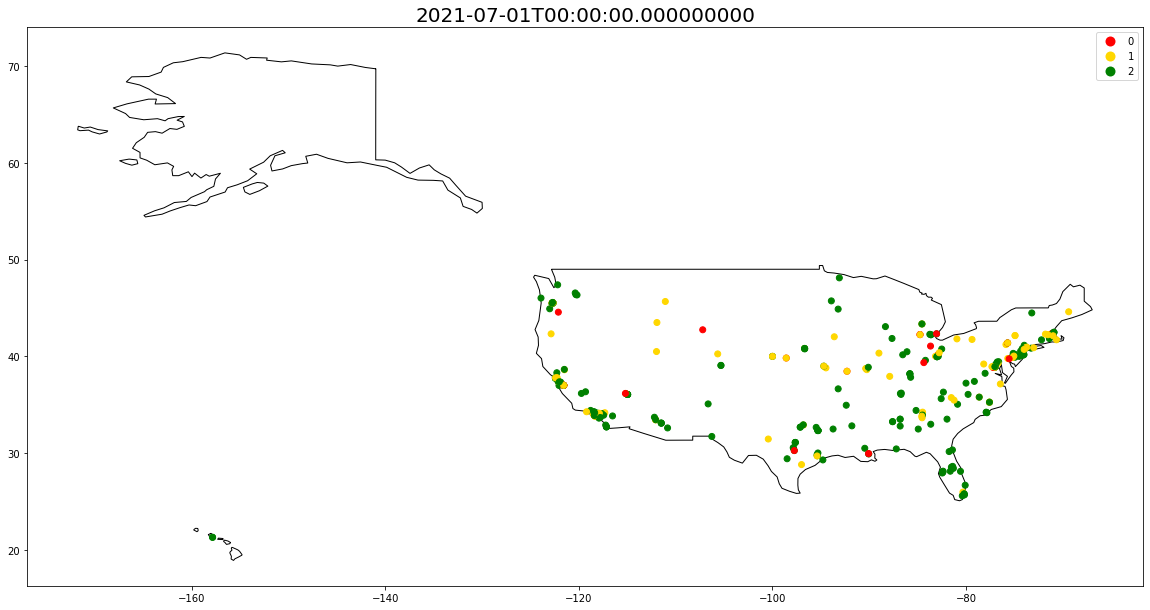

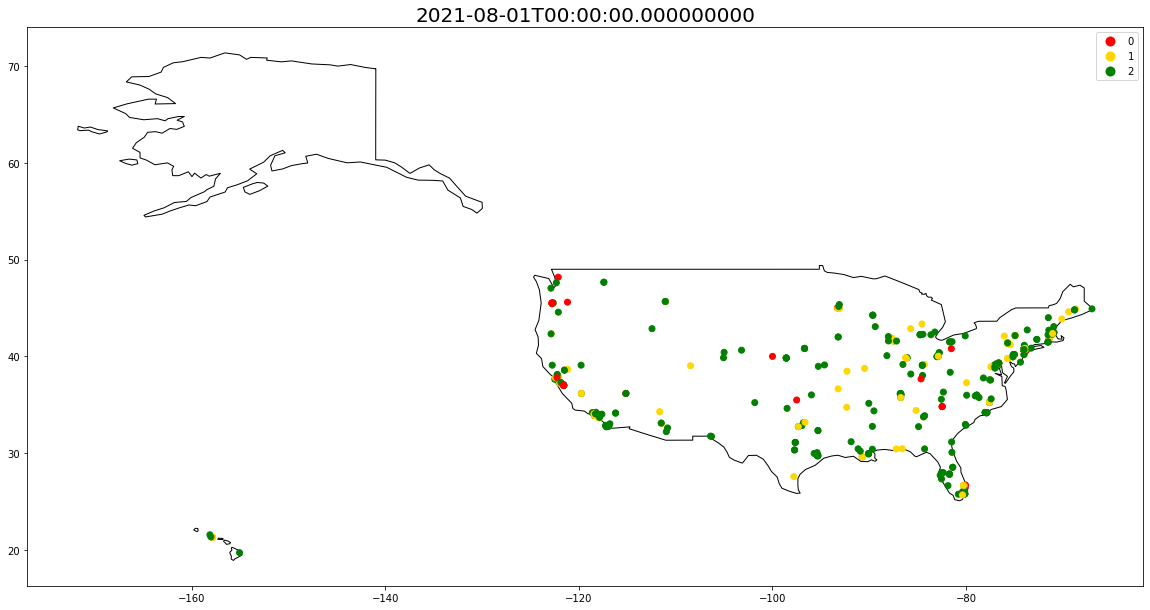

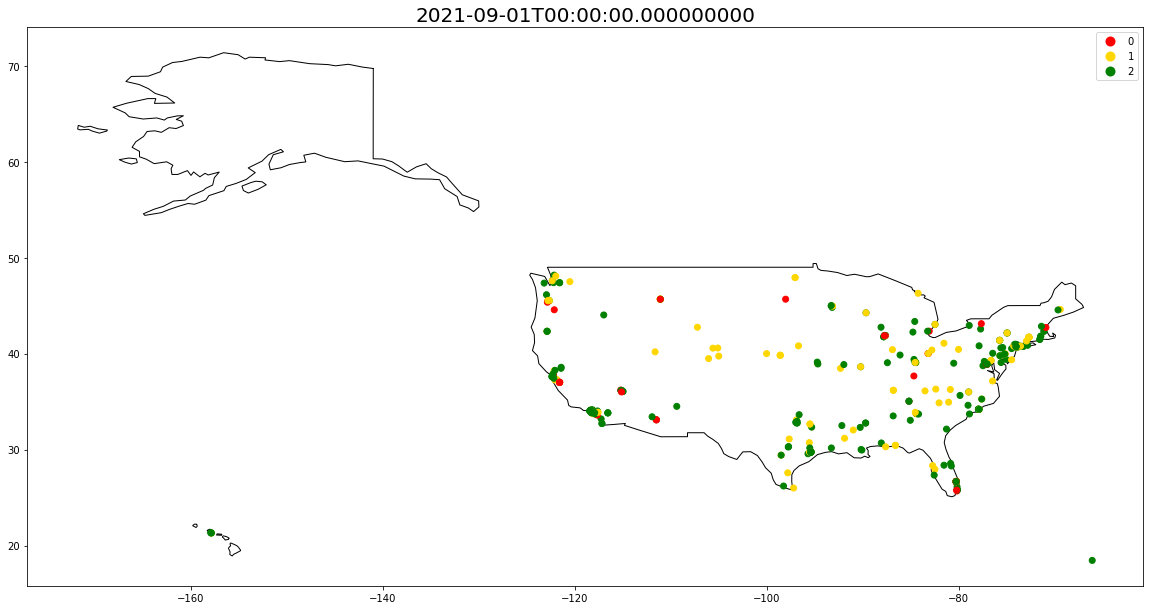

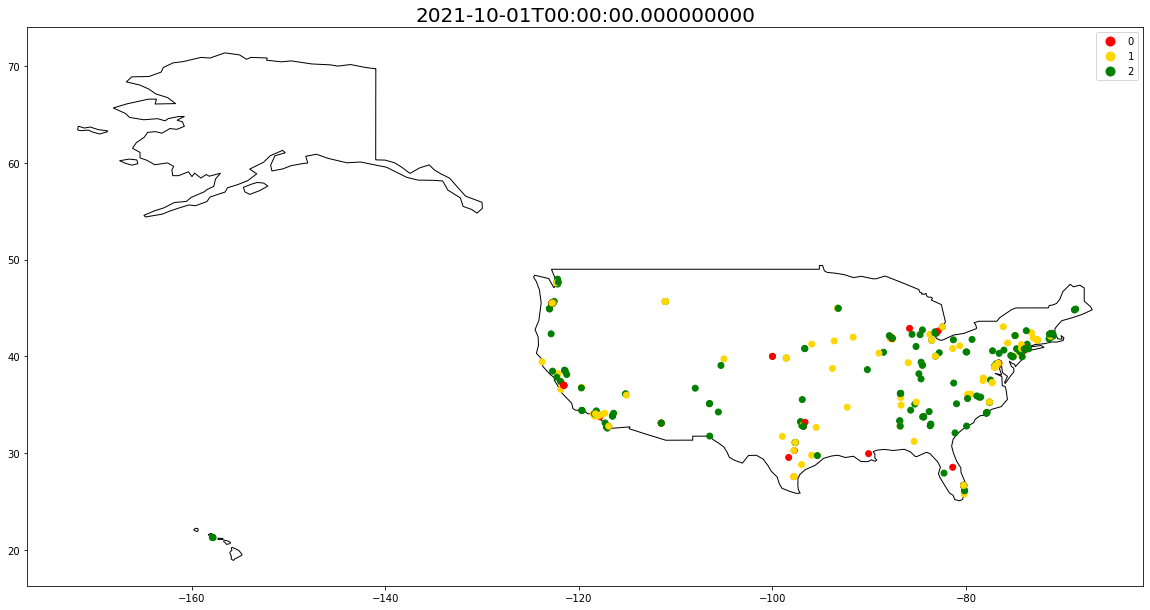

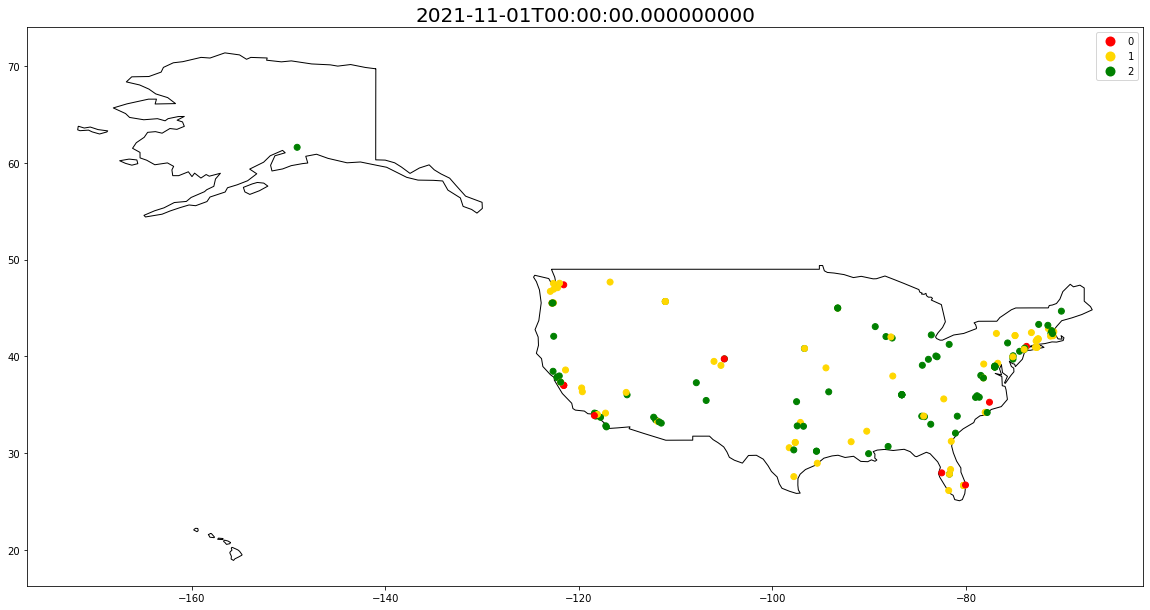

In [131]:
for i in np.sort(geovax['monthyear'].unique()):
    fig, ax = plt.subplots(figsize=(20, 20))

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    world[world.name == 'United States of America'].plot(color='white', edgecolor='black', ax=ax)

    # We can now plot our ``GeoDataFrame``.
    geovax
    geovax[geovax['monthyear']==i].plot(column='truth', ax=ax, cmap=cmap, legend=True, categorical=True)
    ax.set_title(f'{i}', size=20)
    plt.show()

In [193]:
usa = gpd.read_file('./maps/states_21basic/states.shp')

In [194]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [228]:
geovax = gpd.GeoDataFrame(tweetswithlabels, geometry=gpd.points_from_xy(tweetswithlabels.long, tweetswithlabels.lat))
usa = gpd.read_file('./maps/states_21basic/states.shp')

def stuff(y):
    if type(y) != shapely.geometry.polygon.Polygon:
        return [x for x in y.geoms]
    return [y]

usa['polys'] = usa.geometry.map(lambda x: stuff(x))

geovax[usa.columns] = None
for i, row in geovax.iterrows():
    point = Point(row['long'], row['lat'])
    if len(usa[usa.apply(lambda x: point.within(x['geometry']), axis=1)])!=0:
        geovax.loc[i, usa.columns] = usa[usa.apply(lambda x: point.within(x['geometry']), axis=1)].reset_index(drop=True).iloc[0]
    else:
        geovax.loc[i, usa.columns] = usa.iloc[usa.polys.map(lambda x: min([geo.exterior.distance(point) for geo in x])).argmin()]

In [207]:
geovax['truth']

0         neutral
1        positive
2         neutral
3         neutral
4         neutral
           ...   
10186     neutral
10187    positive
10188    negative
10189     neutral
10190    negative
Name: truth, Length: 10191, dtype: object

In [196]:
def state_plotter(states, us_map=True):
    fig, ax = plt.subplots(figsize=(30,30))
    if us_map:
        if'HI' in states:
            usa[0:50].plot(ax=ax, alpha = .3)
        elif 'AK' in states:
            usa[1:51].plot(ax=ax, alpha=.3)
        elif 'AK' and 'HI' in states:
            usa[0:51].plot(ax=ax,alpha=.3)
        else:
            usa[1:50].plot(ax=ax,alpha=.3)
        for n in states:
            usa[usa.STATE_ABBR ==f'{n}'].plot(ax=ax, edgecolor='y', linewidth=2)
    elif us_map==False:
        for n in states:
            usa[usa.STATE_ABBR ==f'{n}'].plot(ax=ax, edgecolor='y', linewidth=2) 

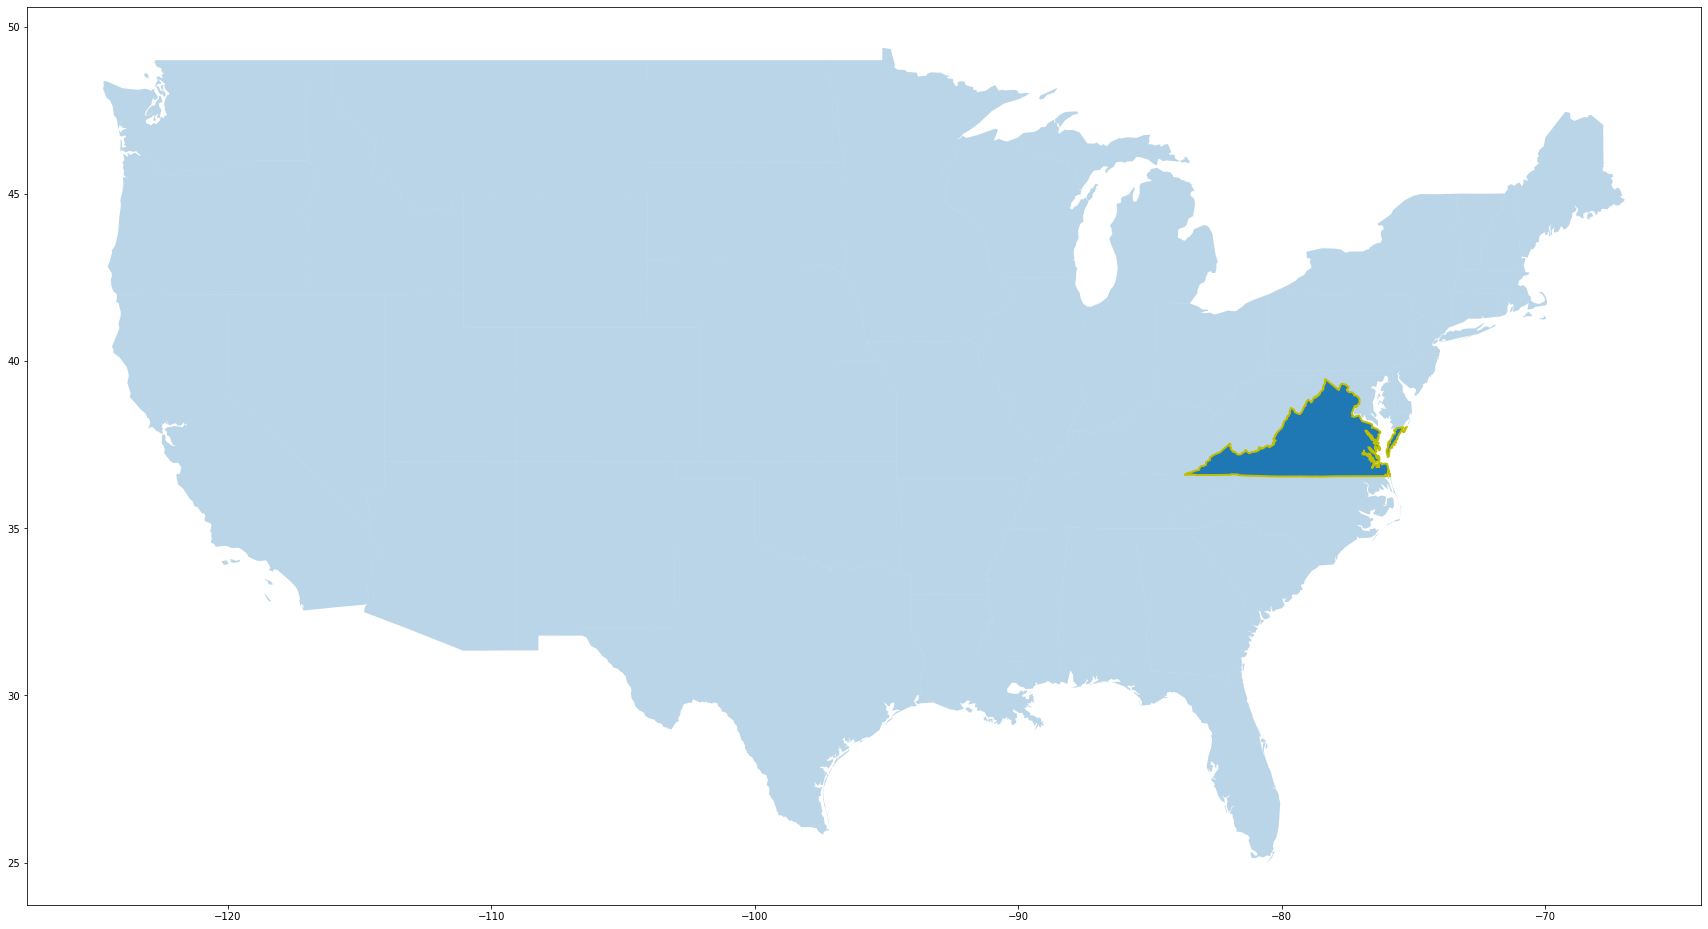

In [291]:
state_plotter(['VA'])

In [208]:
def regionalTweets(geovax, region):
    regiontweets = geovax[geovax['SUB_REGION']==region]
    d1 = regiontweets[regiontweets['truth']=='negative'].groupby('monthyear').count()['id']/regiontweets.groupby('monthyear').count()['id']
    d2 = regiontweets[regiontweets['truth']=='neutral'].groupby('monthyear').count()['id']/regiontweets.groupby('monthyear').count()['id']
    d3 = regiontweets[regiontweets['truth']=='positive'].groupby('monthyear').count()['id']/regiontweets.groupby('monthyear').count()['id']

    d1 = d1.reset_index().rename({'id':'negative'}, axis=1)[['monthyear', 'negative']]
    d2 = d2.reset_index().rename({'id':'neutral'}, axis=1)[['monthyear', 'neutral']]
    d3 = d3.reset_index().rename({'id':'positive'}, axis=1)[['monthyear', 'positive']]

    d1 = d1.merge(d2, on='monthyear', how='inner').merge(d3, on='monthyear', how='inner').fillna(0)
    return d1

regions = {x:regionalTweets(geovax, x) for x in geovax['SUB_REGION'].unique()}

In [229]:
geovax['SUB_REGION'].value_counts()

South Atlantic        2319
Pacific               2274
Middle Atlantic       1736
West South Central     981
East North Central     917
Mountain               614
New England            470
West North Central     453
East South Central     427
Name: SUB_REGION, dtype: int64

In [209]:
{x:regions[x]['negative'].mean() for x in regions.keys()}

{'East North Central': 0.03978850593554296,
 'Mountain': 0.13755477108847436,
 'South Atlantic': 0.07866109031201185,
 'Middle Atlantic': 0.04122614076306722,
 'New England': 0.057149717716868345,
 'West South Central': 0.07578752618536869,
 'Pacific': 0.1469748734781913,
 'East South Central': 0.0695277077210927,
 'West North Central': 0.06419851942965743}

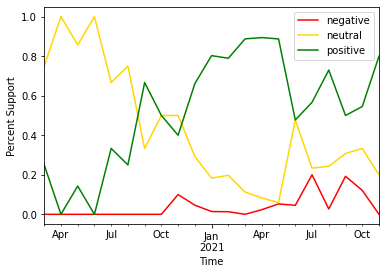

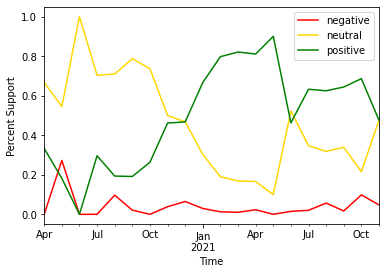

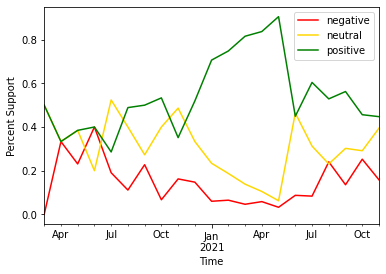

In [212]:
for x in ['East North Central', 'Middle Atlantic', 'Pacific']:
    ax = regions[x].groupby('monthyear').mean().plot(cmap=cmap)
    #ax.set_title(f'Distribution of Vaccine Support in the {x} Region')
    ax.set_xlabel('Time')
    ax.set_ylabel('Percent Support')
    d1

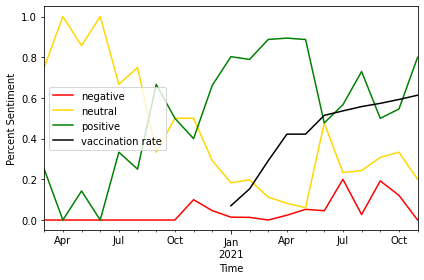

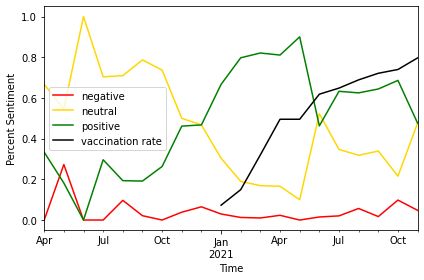

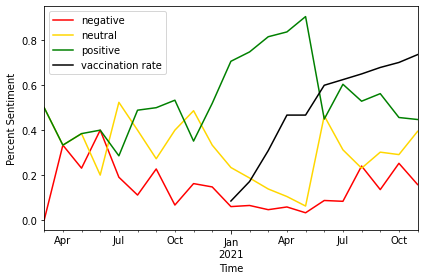

In [217]:
vaccination_data = pd.read_csv('C://Users/Barrett/us_state_vaccinations.csv') # from https://ourworldindata.org/us-states-vaccinations
def filter_rows_by_values(X, col, values):
    return X[~X[col].isin(values)]

non_usstates = ['American Samoa', 'Bureau of Prisons', 'Dept of Defense', 'Federated States of Micronesia', 'Guam', 'Indian Health Svc',
 'Long Term Care', 'Marshall Islands', 'Northern Mariana Islands', 'Republic of Palau', 'Veterans Health', 'Virgin Islands']
vaccination_data = filter_rows_by_values(vaccination_data, 'location', non_usstates)
# set New York state label equal to usa geopandas labels
vaccination_data['location'][vaccination_data['location'] == 'New York State'] = "New York"
end_of_month = ['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
                '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30']
vaccination_data[usa.columns] = np.nan
for i, row in usa.iterrows():
    for j, row2 in vaccination_data[vaccination_data['location'] == str(row['STATE_NAME'])].iterrows():
        vaccination_data.loc[j, usa.columns] = row

def regionalVaccination(geovax, region, end_of_month):
    regionvaccination = geovax[geovax['SUB_REGION']==region]
    d1 = regionvaccination[regionvaccination['date'].isin(end_of_month)].fillna(method='ffill').groupby('date').mean()['people_vaccinated_per_hundred']/100
    d1 = d1.reset_index().rename({'date': 'monthyear', 'people_vaccinated_per_hundred': 'vaccination rate'}, axis=1)[['monthyear', 'vaccination rate']]
    d1['monthyear'] = d1['monthyear'].astype('datetime64[ns]')
    return d1

regions_vax = {x:regionalVaccination(vaccination_data, x, end_of_month) for x in vaccination_data['SUB_REGION'].unique()}
# regional plots
for x in ['East North Central', 'Middle Atlantic', 'Pacific']:
    ax = regions[x].groupby('monthyear').mean().plot(cmap=cmap)
    regions_vax[x].groupby('monthyear').mean().plot(ax=ax, color='black')
    #ax.set_title(f'Distribution of Vaccine Sentiment in the {x} Region')
    ax.set_ylabel('Percent Sentiment')
    ax.set_xlabel('Time')
    plt.tight_layout()
    #plt.savefig(f'images/Sentiment_{x}.png')
    plt.show()


In [222]:
regions

{'East North Central':     monthyear  negative   neutral  positive
 0  2020-03-01  0.000000  0.750000  0.250000
 1  2020-04-01  0.000000  1.000000  0.000000
 2  2020-05-01  0.000000  0.857143  0.142857
 3  2020-06-01  0.000000  1.000000  0.000000
 4  2020-07-01  0.000000  0.666667  0.333333
 5  2020-08-01  0.000000  0.750000  0.250000
 6  2020-09-01  0.000000  0.333333  0.666667
 7  2020-10-01  0.000000  0.500000  0.500000
 8  2020-11-01  0.100000  0.500000  0.400000
 9  2020-12-01  0.046154  0.292308  0.661538
 10 2021-01-01  0.014085  0.183099  0.802817
 11 2021-02-01  0.013158  0.197368  0.789474
 12 2021-03-01  0.000000  0.112426  0.887574
 13 2021-04-01  0.023529  0.082353  0.894118
 14 2021-05-01  0.052632  0.060150  0.887218
 15 2021-06-01  0.045455  0.477273  0.477273
 16 2021-07-01  0.200000  0.233333  0.566667
 17 2021-08-01  0.027027  0.243243  0.729730
 18 2021-09-01  0.192308  0.307692  0.500000
 19 2021-10-01  0.121212  0.333333  0.545455
 20 2021-11-01  0.000000  0.20000

,monthyear,negative,neutral,positive
0,2020-03-01,0.000000,0.750000,0.250000
1,2020-04-01,0.000000,1.000000,0.000000
2,2020-05-01,0.000000,0.857143,0.142857
3,2020-06-01,0.000000,1.000000,0.000000
4,2020-07-01,0.000000,0.666667,0.333333
5,2020-08-01,0.000000,0.750000,0.250000
6,2020-09-01,0.000000,0.333333,0.666667
7,2020-10-01,0.000000,0.500000,0.500000
8,2020-11-01,0.100000,0.500000,0.400000
9,2020-12-01,0.046154,0.292308,0.661538


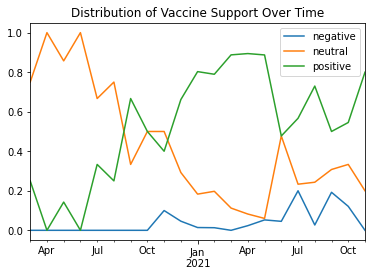

In [274]:

def regionalTweets(geovax, region):
    regiontweets = geovax[geovax['SUB_REGION']==region]
    d1 = regiontweets[regiontweets['truth']==0].groupby('monthyear').count()['id']/regiontweets.groupby('monthyear').count()['id']
    d2 = regiontweets[regiontweets['truth']==1].groupby('monthyear').count()['id']/regiontweets.groupby('monthyear').count()['id']
    d3 = regiontweets[regiontweets['truth']==2].groupby('monthyear').count()['id']/regiontweets.groupby('monthyear').count()['id']

    d1 = d1.reset_index().rename({'id':'negative'}, axis=1)[['monthyear', 'negative']]
    d2 = d2.reset_index().rename({'id':'neutral'}, axis=1)[['monthyear', 'neutral']]
    d3 = d3.reset_index().rename({'id':'positive'}, axis=1)[['monthyear', 'positive']]

    d1 = d1.merge(d2, on='monthyear', how='inner').merge(d3, on='monthyear', how='inner').fillna(0)

ax = d1.groupby('monthyear').mean().plot()
ax.set_title('Distribution of Vaccine Support Over Time')
ax.set_xlabel('')
d1

In [93]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

# CT-BERT

In [1]:
import torch
from PIL import Image
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from torch.utils.data import TensorDataset, DataLoader
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms

import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig
import time
import datetime
import random
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from transformers import BertModel, BertConfig


device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification

In [3]:
# modelname = 'digitalepidemiologylab/covid-twitter-bert-v2'
modelname = 'bert-large-uncased'
config = AutoConfig.from_pretrained(modelname, num_labels=3)
tokenizer = AutoTokenizer.from_pretrained(modelname, config=config)
model = AutoModelForSequenceClassification.from_pretrained(modelname, config=config)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

In [4]:
train = pd.read_csv('C:/Users/Barrett/covid-twitter-bert/data/finetune/run_2021-11-20_18-58-13_034739_test_run/vaccinesentiment/preprocessed/train.tsv', header=None, sep='\t')
dev = pd.read_csv('C:/Users/Barrett/covid-twitter-bert/data/finetune/run_2021-11-20_18-58-13_034739_test_run/vaccinesentiment/preprocessed/dev.tsv', header=None, sep='\t')
train = train.rename({0:'id', 1:'label', 2:'text'}, axis=1)
dev = dev.rename({0:'id', 1:'label', 2:'text'}, axis=1)

In [5]:
train.text.map(lambda x: len(x.split(' '))).max()

33

In [6]:
def makeData(df, tokenizer):
    maxval = 96#df.text.map(lambda x: len(x)).max()
    print(f'Max val: {maxval}')
    sentences = df.text.values
    labels = df.label.values
    input_ids = []
    # For every sentence...
    for sent in sentences:
        # `encode` will:
        #   (1) Tokenize the sentence.
        #   (2) Prepend the `[CLS]` token to the start.
        #   (3) Append the `[SEP]` token to the end.
        #   (4) Map tokens to their IDs.
        encoded_sent = tokenizer.encode(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True,
                            truncation=True,# Add '[CLS]' and '[SEP]'
                            # This function also supports truncation and conversion
                            # to pytorch tensors, but we need to do padding, so we
                            # can't use these features :( .
                            max_length = maxval,          # Truncate all sentences.
                            #return_tensors = 'pt',     # Return pytorch tensors.
                            padding='max_length',
                            pad_to_max_length=True
                       )

        # Add the encoded sentence to the list.
        input_ids.append(encoded_sent)
    # Print sentence 0, now as a list of IDs.
    print('Original: ', sentences[0])
    print('Token IDs:', input_ids[0])
    # Create attention masks
    attention_masks = []
    # For each sentence...
    for sent in input_ids:

        # Create the attention mask.
        #   - If a token ID is 0, then it's padding, set the mask to 0.
        #   - If a token ID is > 0, then it's a real token, set the mask to 1.
        att_mask = [int(token_id > 0) for token_id in sent]

        # Store the attention mask for this sentence.
        attention_masks.append(att_mask)
    return [input_ids, labels, attention_masks]

In [7]:
train_inputs, train_labels, train_masks = makeData(train, tokenizer)
validation_inputs, validation_labels, validation_masks = makeData(dev, tokenizer)

Max val: 96
Original:  well, here i am getting my immunizations for school. whatever it takes to get to the finish line. :)
Token IDs: [101, 2092, 1010, 2182, 1045, 2572, 2893, 2026, 10047, 23041, 22318, 2005, 2082, 1012, 3649, 2009, 3138, 2000, 2131, 2000, 1996, 3926, 2240, 1012, 1024, 1007, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max val: 96
Original:  pushing it to the limit tonight twitteruser #madhatterdc #mixmasterrod #mmr #newedm #nochill... twitterurl
Token IDs: [101, 6183, 2009, 2000, 1996, 5787, 3892, 10474, 20330, 1001, 5506, 12707, 3334, 16409, 1001, 4666, 8706, 14127, 1001, 3461, 2099, 1001, 2047, 2098, 2213, 1001, 2053, 5428, 3363, 1012, 1012, 1012, 10474, 3126, 2140, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [9]:
batch_size = 8
# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=8)

In [10]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1

In [11]:
# for param in model.bert.parameters():
#     param.requires_grad=False

In [12]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [13]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [14]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5 # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  #eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
# optimizer = Adafactor(
#     model.parameters(),
#     lr=2e-5,
#     eps=(1e-30, 1e-3),
#     clip_threshold=1.0,
#     decay_rate=-0.8,
#     beta1=None,
#     weight_decay=0.0,
#     relative_step=False,
#     scale_parameter=False,
#     warmup_init=False
# )
from transformers import get_linear_schedule_with_warmup
from transformers import get_polynomial_decay_schedule_with_warmup
# Number of training epochs (authors recommend between 2 and 4)
epochs = 1
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
# scheduler = get_linear_schedule_with_warmup(optimizer, 
#                                             num_warmup_steps = 198, # Default value in run_glue.py
#                                             num_training_steps = total_steps)
warmup_steps = int((epochs * len(train_dataloader) * .1)/ batch_size)
scheduler = get_polynomial_decay_schedule_with_warmup(optimizer,
                                               num_warmup_steps=warmup_steps,
                                               num_training_steps = total_steps,
                                               lr_end=0)

In [15]:
warmup_steps

24

In [16]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
# Store the average loss after each epoch so we can plot them.
loss_values = []
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    # Measure how long the training epoch takes.
    t0 = time.time()
    # Reset the total loss for this epoch.
    total_loss = 0
    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        
        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.
    print("")
    print("Running Validation...")
    logitsTL = np.array([])
    labelsTL = np.array([])
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        logitsTL = np.append(logitsTL, logits)
        labelsTL = np.append(labelsTL, label_ids)
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        # Track the number of batches
        nb_eval_steps += 1
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")

model.eval()
featuresTrain = []
labelsTrain= np.array([])
for step, batch in enumerate(train_dataloader):
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    with torch.no_grad():  
        featuresTrain.append(model.bert(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask).pooler_output.detach().cpu().numpy())
        labelsTrain = np.append(labelsTrain, b_labels.detach().cpu().numpy())
featuresVal = []
labelsVal= np.array([])
for step, batch in enumerate(validation_dataloader):
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    with torch.no_grad():  
        featuresVal.append(model.bert(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask).pooler_output.detach().cpu().numpy())
        labelsVal = np.append(labelsVal, b_labels.detach().cpu().numpy())


======== Epoch 1 / 1 ========
Training...
  Batch    40  of  1,983.    Elapsed: 0:00:20.
  Batch    80  of  1,983.    Elapsed: 0:00:40.
  Batch   120  of  1,983.    Elapsed: 0:01:01.
  Batch   160  of  1,983.    Elapsed: 0:01:21.
  Batch   200  of  1,983.    Elapsed: 0:01:42.
  Batch   240  of  1,983.    Elapsed: 0:02:02.
  Batch   280  of  1,983.    Elapsed: 0:02:23.
  Batch   320  of  1,983.    Elapsed: 0:02:43.
  Batch   360  of  1,983.    Elapsed: 0:03:04.
  Batch   400  of  1,983.    Elapsed: 0:03:24.
  Batch   440  of  1,983.    Elapsed: 0:03:44.
  Batch   480  of  1,983.    Elapsed: 0:04:05.
  Batch   520  of  1,983.    Elapsed: 0:04:25.
  Batch   560  of  1,983.    Elapsed: 0:04:46.
  Batch   600  of  1,983.    Elapsed: 0:05:06.
  Batch   640  of  1,983.    Elapsed: 0:05:26.
  Batch   680  of  1,983.    Elapsed: 0:05:47.
  Batch   720  of  1,983.    Elapsed: 0:06:07.
  Batch   760  of  1,983.    Elapsed: 0:06:28.
  Batch   800  of  1,983.    Elapsed: 0:06:48.
  Batch   840  of

In [19]:
ypred = np.argmax(logitsTL.reshape(len(logitsTL)//3,3), axis=1).flatten()
ytrue = labelsTL
f1_score(ypred, ytrue, average='micro')

0.7901304594441293

In [18]:
from sklearn.metrics import f1_score

# Test Our Data

In [23]:
train = pd.read_csv('C:/Users/Barrett/covid-twitter-bert/data/finetune/run_2021-11-30_14-04-40_803440_covid_run/covid/preprocessed/train.tsv', header=None, sep='\t')
dev = pd.read_csv('C:/Users/Barrett/covid-twitter-bert/data/finetune/run_2021-11-30_14-04-40_803440_covid_run/covid/preprocessed/dev.tsv', header=None, sep='\t')
train = train.rename({0:'id', 1:'label', 2:'text'}, axis=1)
dev = dev.rename({0:'id', 1:'label', 2:'text'}, axis=1)

train_inputs, train_labels, train_masks = makeData(train, tokenizer)
validation_inputs, validation_labels, validation_masks = makeData(dev, tokenizer)

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

batch_size = 8
# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=8)



Max val: 96
Original:  need i say more than what's posted on the photo?:face_with_raised_eyebrow: .. all facts. #theartofthinkingoutloud #billgates #vaccines #virus #pandemic #socialdistancing #devil #evil #corona #life #usa @ cincinnati twitterurl
Token IDs: [101, 2342, 1045, 2360, 2062, 2084, 2054, 1005, 1055, 6866, 2006, 1996, 6302, 1029, 1024, 2227, 1035, 2007, 1035, 2992, 1035, 9522, 1024, 1012, 1012, 2035, 8866, 1012, 1001, 1996, 8445, 15794, 10606, 6834, 5833, 23743, 2094, 1001, 3021, 5867, 2015, 1001, 28896, 1001, 7865, 1001, 6090, 3207, 7712, 1001, 2591, 10521, 5794, 6129, 1001, 6548, 1001, 4763, 1001, 21887, 1001, 2166, 1001, 3915, 1030, 7797, 10474, 3126, 2140, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max val: 96
Original:  #covid19 #vaccines #vaccinating #curlyaroundtheworld @ portland airport (pdx) economy lot twitterurl
Token IDs: [101, 1001, 2522, 17258, 16147, 1001, 28896, 1001, 12436, 14693, 19833, 2075, 1001, 17546, 24490, 107

In [27]:
len(train)

10191

### Test All data

In [20]:
print("")
print("Running Validation...")
logitsTL = np.array([])
labelsTL = np.array([])
t0 = time.time()
# Put the model in evaluation mode--the dropout layers behave differently
# during evaluation.
model.eval()
# Tracking variables 
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
# Evaluate data for one epoch
for batch in train_dataloader:

    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():        
        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have
        # not provided labels.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # Get the "logits" output by the model. The "logits" are the output
    # values prior to applying an activation function like the softmax.
    logits = outputs[0]
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    logitsTL = np.append(logitsTL, logits)
    labelsTL = np.append(labelsTL, label_ids)

    # Calculate the accuracy for this batch of test sentences.
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    # Accumulate the total accuracy.
    eval_accuracy += tmp_eval_accuracy
    # Track the number of batches
    nb_eval_steps += 1
# Report the final accuracy for this validation run.
print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")


Running Validation...


KeyboardInterrupt: 

In [69]:
np.argmax(logitsTL.reshape(len(logitsTL)//3,3), axis=1).flatten()

array([1, 2, 1, ..., 0, 1, 0], dtype=int64)

In [71]:
train['truth'] = np.argmax(logitsTL.reshape(len(logitsTL)//3,3), axis=1).flatten()

In [73]:
train['truth'].value_counts()/len(train)

2    0.735257
1    0.217741
0    0.047002
Name: truth, dtype: float64

In [75]:
train.to_csv('C:/Users/Barrett/ourdata/truthtweets.tsv', sep='\t', index=False)

In [ ]:
train.to_csv('C:/Users/Barrett/ourdata/truthtweets.tsv', sep='\t', index=False)

### Test our labelled data

In [24]:
print("")
print("Running Validation...")
logitsL = np.array([])
labelsL = np.array([])
t0 = time.time()
# Put the model in evaluation mode--the dropout layers behave differently
# during evaluation.
model.eval()
# Tracking variables 
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
# Evaluate data for one epoch
for batch in validation_dataloader:

    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():        
        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have
        # not provided labels.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # Get the "logits" output by the model. The "logits" are the output
    # values prior to applying an activation function like the softmax.
    logits = outputs[0]
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    logitsL = np.append(logitsL, logits)
    labelsL = np.append(labelsL, label_ids)

    # Calculate the accuracy for this batch of test sentences.
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    # Accumulate the total accuracy.
    eval_accuracy += tmp_eval_accuracy
    # Track the number of batches
    nb_eval_steps += 1
# Report the final accuracy for this validation run.
print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")


Running Validation...
  Accuracy: 0.79
  Validation took: 0:00:03

Training complete!


In [28]:
flat_accuracy(logitsL.reshape(200,3), labelsL)

0.805

In [25]:
ypred = np.argmax(logitsL.reshape(len(logitsL)//3,3), axis=1).flatten()
ytrue = labelsL
f1_score(ypred, ytrue, average='micro')

0.79

In [26]:
np.argmax(logitsL.reshape(200,3), axis=1).flatten()

array([2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 1], dtype=int64)

In [80]:
dev['bert_label'] = np.argmax(logitsL.reshape(200,3), axis=1).flatten()

In [82]:
dev.to_csv('C:/Users/Barrett/ourdata/labeldevtweets.tsv', sep='\t', index=False)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(logitsL.reshape(200,3), axis=1).flatten(), labelsL)

array([[ 10,   0,   4],
       [  2,  16,  41],
       [  1,  13, 113]], dtype=int64)

In [38]:
unique, counts = np.unique(np.argmax(logitsL.reshape(200,3), axis=1).flatten(), return_counts=True)

In [39]:
counts / counts.sum()

array([0.05, 0.21, 0.74])